#### Mohamad Quteifan, Kayla Thompson, Gloria Moore
#### Professor: Brett Werner
#### DSC 630: Predictive Analytics

# Abstract

Global Sport Market has increased its total revenues in about 35% in the last 15 years. Total revenue of all 32 National Football League (NFL) teams has risen from about 4 billion U.S. dollars in 2001 to over 15 billion U.S. dollars in 2019, the highest figure to date [1]. The uses of data analysis and statistics in sports helps coaches, players, fans, advertising industry, etc., it helps not only to win games but to improve players performances, prevent injuries, fun for fans, and so on. 
Legendary football coach Paul “Bear” Bryant famously said, “Offense sells tickets. Defense wins championships”, if this is true, predicting what defense scheme is going to result in stopping the yard gain of the other team, this prediction will give you the championship. 

In 2002 Oakland Athletics baseball team made people realize the serious effect the use of data analytics could have on the success of a team, the first team in NFL to lead the data analytics technique was the Philadelphia Eagles. Beginning in 2014, Eagles head coach Doug Pederson made it clear that all decisions made by the organization were going to be informed by analytics. Ryan Paganetti started in the Eagles’ analytics department in 2014 [2].

The NFL team dedicates their time to set defenses strategies according with a list of possible offense plays, based on this concept, prediction of 0-yard gains taking in consideration features like, type of play, yards to gain, offense formation, and others, could give the coaches an insight of how to play the next game.



# Problem Statement: 

Since the inception of the National Football League (NFL) in 1920, defensive coordinators have been aggressively seeking any advantage over opposing offenses. The desire for an advantage has led to numerous reports of cheating, none more notable than deflate-gate. The controversial event gave the New England Patriots defense a huge advantage, given they deflated the footballs during the practices leading up to the American Football Conference (AFC) Championship Game against the Indianapolis Colts in 2014 [3]. The New England Patriots were disciplined by the NFL resulting in the case going to the Supreme Court. The Patriots were found guilty and as a result, lost two draft selections in the 2016 NFL draft, fined $1 Million, and Tom Brady, the Quarterback, was suspended for four games for his involvement in the scandal [3]. 

Despite this scandal, there remains a need for defensive coordinators to have an ethical means of gaining an advantage. With this project, we aim to create a model to aid defensive coordinators in their game planning. The proposed project will give the defensive coordinators an advantage by using data science modeling techniques to provide the defensive coordinators insights into which of their schemes will best defend against their opponent’s offense. This method will not only be more ethical but also will ultimately prove more effective than deflate-gate.  

This project will be delivered in the milestones set by Bellevue University Department of Science and Technology. We will work towards our problem stated, analyzing the data set, applying Exploratory Data Analysis (EDA) techniques and finally creating, evaluating and selecting a model. Assumptions to get to this model will be explained and detailed in future steps of our project based on the analysis of the data set and features of interest.

The remainder of this document will serve to document the proposed process for building a model that will solve the problem statement detailed above. The data and the techniques that will be implemented to clean the data will be outlined along with the steps we will use to build the model. We will discuss how we intend to evaluate our model’s efficacy and any risks associated with this model. As this is just a preliminary proposal, all of this is subject to change based on the results we observe through our work. 

# Methods


## Exploratory Data Analysis

Import libraries

In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
from scipy import stats
!pip install missingno
import missingno as msno 
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Frame Analysis

The following data set was extratect from: https://www.kaggle.com/c/nfl-big-data-bowl-2021/data
This data frame contains play-level information for each game.
Variables description can be found using the link provided
Following section looks to import data set in Pandas Data frame as well as describe the principal variables that we have defined.

In [561]:
df = pd.read_csv("plays.csv")

In [562]:
df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [563]:
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [564]:
print("The shape of the data:\n",
      df.shape, 
      "\nThe first 5 rows are:\n", 
      df.head(), 
      "\nThe last 5 rows are:\n",
      df.tail(), 
      "\nThe column names are:\n",
      df.columns)
      

The shape of the data:
 (19239, 27) 
The first 5 rows are:
        gameId  playId                                    playDescription  \
0  2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1  2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   
2  2018090600     168  (13:05) (Shotgun) M.Ryan pass incomplete short...   
3  2018090600     190  (13:01) (Shotgun) M.Ryan pass deep left to J.J...   
4  2018090600     256  (10:59) (Shotgun) M.Ryan pass incomplete short...   

   quarter  down  yardsToGo possessionTeam        playType yardlineSide  \
0        1     1         15            ATL  play_type_pass          ATL   
1        1     1         10            ATL  play_type_pass          PHI   
2        1     2         10            ATL  play_type_pass          PHI   
3        1     3         10            ATL  play_type_pass          PHI   
4        1     3          1            ATL  play_type_pass          PHI   

   yardlineNumber  ... preSnapHo

## Part 1: Variable Analysis

### Variable 1st Selection:

In an effort to begin to get familiar with the variables in our data while also begining to identify relationships between variables we have done some very quick variable analysis using value counts. 

In [565]:
print(
    "Yards To Go :\n",df["yardsToGo"].value_counts(),
    "Play Type:\n", df["playType"].value_counts(),
    "Offense Formation:\n", df["offenseFormation"].value_counts(),
    "Offensive Personnel:\n", df["personnelO"].value_counts(),
    "Defenders In The Box:\n", df["defendersInTheBox"].value_counts(),
    "Number Of Pass Rushers:\n", df["numberOfPassRushers"].value_counts(),
    "Defensive personnel:\n", df["personnelD"].value_counts(),
    "The Result of Pass Play:\n", df["passResult"].value_counts(),
    "Offense Play Result:\n", df["offensePlayResult"].value_counts(),
    "Play Results:\n", df["playResult"].value_counts(),
     )

Yards To Go :
 10    8684
6     1071
7     1047
8     1003
5      992
9      932
4      852
3      769
2      618
1      522
11     432
15     421
12     366
20     310
13     257
14     224
16     159
17     156
18     127
19     102
21      45
22      37
25      35
23      24
30      13
24      12
26      10
28       7
27       4
29       3
32       2
41       1
38       1
33       1
Name: yardsToGo, dtype: int64 Play Type:
 play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64 Offense Formation:
 SHOTGUN       12627
SINGLEBACK     2790
EMPTY          2428
I_FORM          915
PISTOL          251
JUMBO            51
WILDCAT          36
Name: offenseFormation, dtype: int64 Offensive Personnel:
 1 RB, 1 TE, 3 WR                            13716
1 RB, 2 TE, 2 WR                             2737
2 RB, 1 TE, 2 WR                             1083
1 RB, 3 TE, 1 WR                              406
1 RB, 0 TE, 4 WR                        

#### Quick Variable analysis: 
We made a few key discoveries running through the values of each feature(features that matter for the research). One key discovery comes from the playType feature. We can see that all the plays are passing plays and the data does not contain any running plays. I have to review the "play_type_unknown" value and ensure that it is a pass play. The other value, "play_type_sack" is a negative result of the pass play and it is still classified as a pass play. This was not known before and will change the overall problem statement. 

KEY TAKEAWAYS:
1. No Running Plays

2. Shotgun most common play

3. Most common offensive formation: 1 RB, 1 TE, 3 WR, 2nd most common: 1 RB, 2 TE, 2 WR

4. There usually 6-7 defenders in the box but this varies -- 4 to 8 is rather consistent.

5. Usually 4 defenders rush the passer

6. Most common defensive formation: 4 DL, 2 LB, 5 DB, with 3 DL, 3 LB, 5 DB as the runner up
- defense formations deviate more than offensive formations.

7. Defense usually wins the battle with the offense on most plays, the most common play result ==0

8. More completed passes than incomplete. 

#### Evaluating what "play_type_unknown" represents in the data

We have a significant number of unknown play types - in the below analysis we aim to identify what that group is comprised of. 

In [566]:
df_copy = df.copy()
df_copy.loc[(df_copy['playType'] == "play_type_unknown")]
df_copy.loc[(df_copy['playType'] == "play_type_unknown")]


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18606,2018090600,1226,(8:23) (Shotgun) N.Foles pass incomplete short...,2,3,7,PHI,play_type_unknown,ATL,17,...,NaN,NaN,NaN,DPI,ATL 21,I,0,8,1.169181,True
18607,2018090600,1715,(1:50) (Shotgun) N.Foles pass short right to N...,2,1,10,PHI,play_type_unknown,PHI,24,...,NaN,NaN,NaN,DH,ATL 21,C,7,5,0.169598,False
18608,2018090600,2305,(13:44) (Shotgun) N.Foles pass incomplete shor...,3,1,10,PHI,play_type_unknown,PHI,36,...,NaN,NaN,NaN,ICT,ATL 23,I,0,5,0.309866,False
18609,2018090600,3626,(8:31) (Shotgun) N.Foles pass short right to N...,4,3,4,PHI,play_type_unknown,PHI,31,...,NaN,NaN,NaN,OPI,PHI 86,C,10,-10,-0.694743,False
18610,2018090600,4439,(:06) (Shotgun) M.Ryan pass incomplete short r...,4,4,10,ATL,play_type_unknown,PHI,10,...,NaN,NaN,NaN,ICT,PHI 58,I,0,5,1.383655,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


These plays are just pass plays that are either short or incompete. Confirms our orginal conclusion that the data is made up of only pass plays(success + unsuccessful pass plays). What needs to be done with the play type variable is convert to only one value, pass play. This will be much easier to work with and containing those other 2 values is only going to slow down the model and analysis. For the purpose of this study as such is an unsuccessful pass play. 

### Check empty for empty or Nan values

<Figure size 720x720 with 0 Axes>

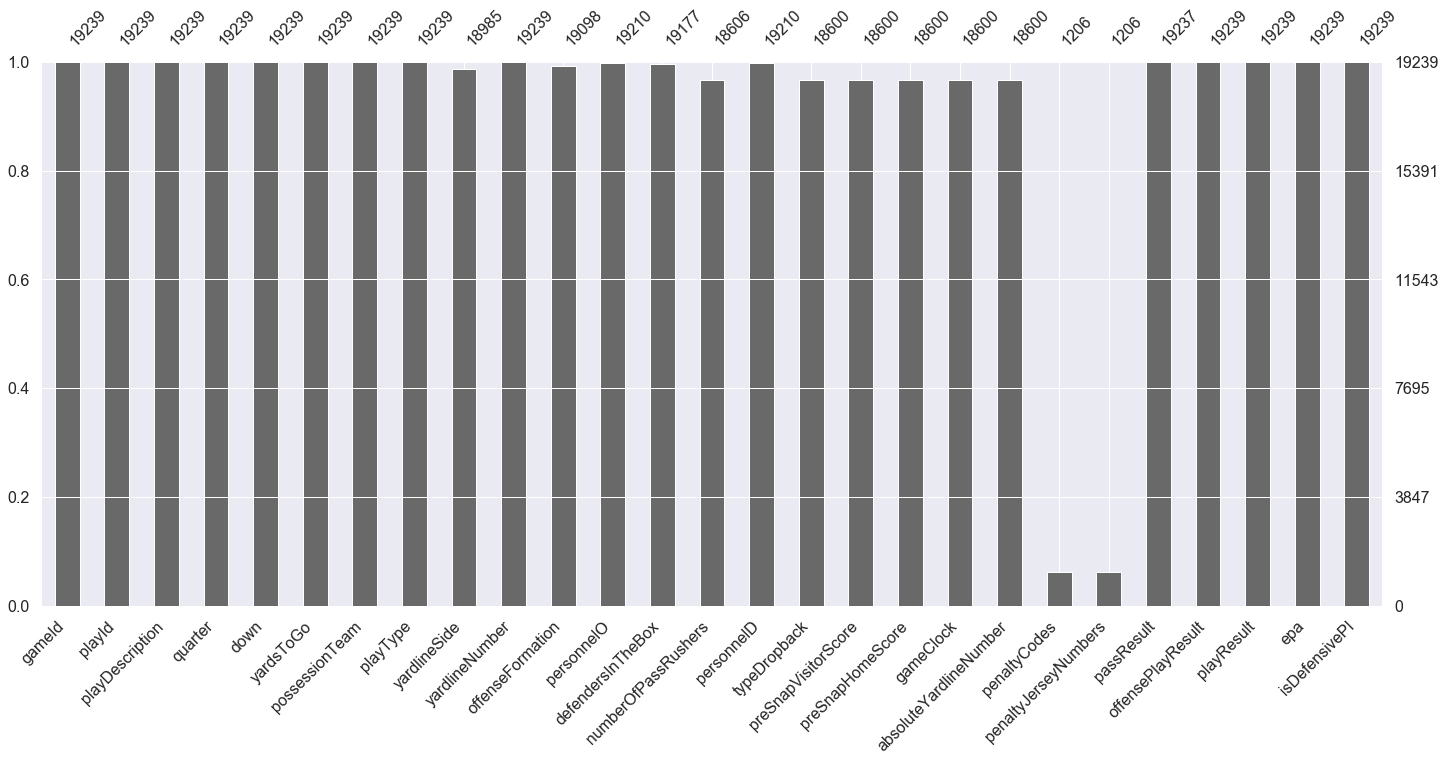

<Figure size 720x720 with 0 Axes>

In [567]:
msno.bar(df)
plt.figure(figsize=(10,10))
# Show the figure

In [568]:
print("There are: ", df["yardsToGo"].isnull().values.sum(), "empty values in the Yards to go feature",
      "\nThere are: ", df["playType"].isnull().values.sum(), "empty values in the Play Type feature",
      "\nThere are: ", df["offenseFormation"].isnull().values.sum(), "empty values in the offense Formation feature",
      "\nThere are: ", df["personnelO"].isnull().values.sum(), "empty values in the Offensive personnel feature",
      "\nThere are: ", df["defendersInTheBox"].isnull().values.sum(), "empty values in the defenders in the box feature",
      "\nThere are: ", df["numberOfPassRushers"].isnull().values.sum(), "empty values in the number Of Pass Rushers feature",
      "\nThere are: ", df["personnelD"].isnull().values.sum(), "empty values in the Defensive personnel feature",
      "\nThere are: ", df["passResult"].isnull().values.sum(), "empty values in the Result of the play feature",
      "\nThere are: ", df["offensePlayResult"].isnull().values.sum(), "empty values in the Result of the offensive Play feature",
      "\nThere are: ", df["playResult"].isnull().values.sum(), "empty values in the play result feature",
      "\nThere are: ", df["down"].isnull().values.sum(),  "empty values in the downs feature")

There are:  0 empty values in the Yards to go feature 
There are:  0 empty values in the Play Type feature 
There are:  141 empty values in the offense Formation feature 
There are:  29 empty values in the Offensive personnel feature 
There are:  62 empty values in the defenders in the box feature 
There are:  633 empty values in the number Of Pass Rushers feature 
There are:  29 empty values in the Defensive personnel feature 
There are:  2 empty values in the Result of the play feature 
There are:  0 empty values in the Result of the offensive Play feature 
There are:  0 empty values in the play result feature 
There are:  0 empty values in the downs feature


There are missing values in the data frame and we have review the offensive formation, offensive personnel, defenders in the box, pass rushers column, Defensive Personnel column and result of the play column. The result of the play column maybe one that we may need to remove from the data because it may lead to issues with the model. 

###  Feature 1 Offensive Personnel (with missing values) analysis and distributions

After identifying the missing values we take a closer look at what those are made up of.

In [569]:
df_copy1 = df.copy()
off_per = df_copy["personnelO"]
off_per

0        2 RB, 1 TE, 2 WR
1        1 RB, 1 TE, 3 WR
2        2 RB, 1 TE, 2 WR
3        1 RB, 1 TE, 3 WR
4        2 RB, 3 TE, 0 WR
               ...       
19234    1 RB, 1 TE, 3 WR
19235    1 RB, 1 TE, 3 WR
19236    1 RB, 1 TE, 3 WR
19237    1 RB, 1 TE, 3 WR
19238    1 RB, 1 TE, 3 WR
Name: personnelO, Length: 19239, dtype: object

In [570]:
off_per.isnull().values.sum()
# mising values, we already knew from earlier.
df1 = df_copy1[off_per.isna()]
df1

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
18629,2018090906,1188,(11:30) (Shotgun) R.Fitzpatrick pass incomplet...,2,3,7,TB,play_type_unknown,NO,15,...,NaN,NaN,NaN,DH;OPI,NO 21;TB 10,I,0,0,-0.000288,False
18658,2018091602,2823,(12:54) (Shotgun) A.Rodgers pass deep right in...,4,1,10,GB,play_type_unknown,GB,36,...,NaN,NaN,NaN,ILM;DH,GB 18;MIN 22,IN,0,0,0.006909,False
18690,2018091611,3501,(3:53) (Shotgun) D.Carr pass deep right to A.C...,4,2,6,OAK,play_type_unknown,OAK,40,...,NaN,NaN,NaN,DPI;OPI,DEN 29;OAK 89,C,29,0,-0.000406,True
18698,2018092303,950,(13:48) E.Manning pass short right to C.Latime...,2,1,10,NYG,play_type_unknown,HOU,27,...,NaN,NaN,NaN,ICT;TAU,HOU 22;NYG 87,C,14,0,-0.001846,False
18699,2018092303,3099,(10:05) (Shotgun) D.Watson pass incomplete dee...,4,1,10,HOU,play_type_unknown,NYG,20,...,NaN,NaN,NaN,OH;DH,HOU 66;NYG 20,I,0,0,0.000406,False
18722,2018092306,1098,(12:26) (Shotgun) R.Tannehill pass incomplete ...,2,3,9,MIA,play_type_unknown,OAK,34,...,NaN,NaN,NaN,OH;RPS,MIA 86;OAK 73,I,0,0,0.002487,False
18775,2018100701,3541,(8:08) (Shotgun) C.Newton pass incomplete shor...,4,1,10,CAR,play_type_unknown,CAR,25,...,NaN,NaN,NaN,OH;RPS,CAR 74;NYG 72,I,0,0,0.002345,False
18780,2018100704,1490,(9:13) M.Stafford pass deep right to M.Jones t...,2,2,8,DET,play_type_unknown,DET,48,...,NaN,NaN,NaN,DPI;ILH,GB 20;DET 60,C,39,0,0.004934,True
18790,2018100711,2987,(4:36) G.Fant reported in as eligible. R.Wils...,3,1,10,SEA,play_type_unknown,SEA,36,...,NaN,NaN,NaN,DH;ING,LA 22;SEA 3,I,0,0,-0.000991,False
18832,2018101412,2923,(:17) (Shotgun) T.Brady pass incomplete deep r...,3,2,9,NE,play_type_unknown,NE,26,...,NaN,NaN,NaN,DH;OPI,KC 23;NE 11,I,0,0,0.000360,False


In [571]:
df1.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

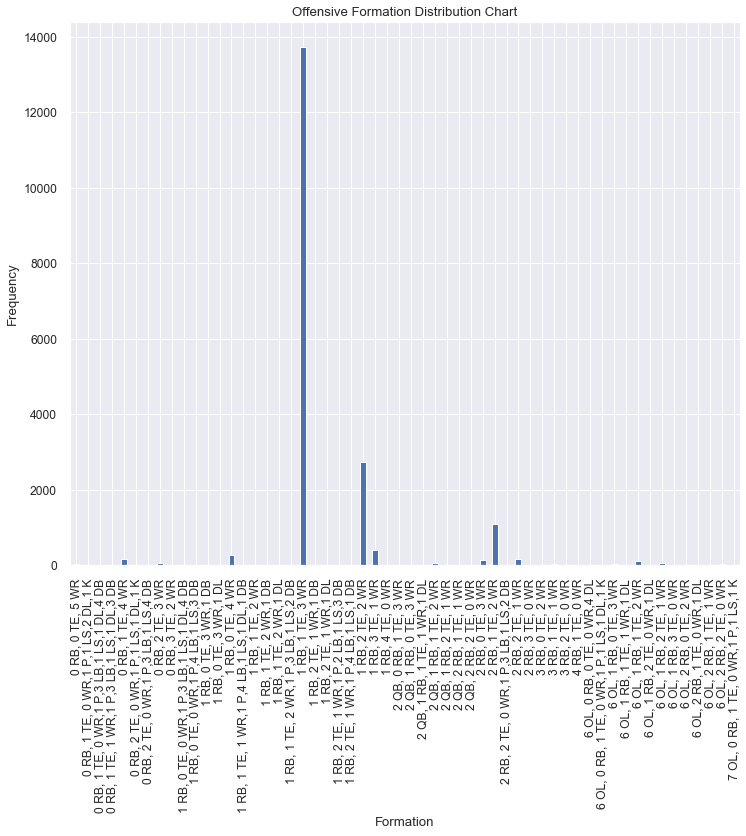

In [572]:
plt.figure(figsize=(12,10))
df_copy1.groupby("personnelO").size().plot(kind='bar')
# Label the axes
plt.xlabel("Formation")
plt.ylabel("Frequency")
plt.title("Offensive Formation Distribution Chart")
# Show the figure
plt.show()

### Analysis on Offensive personnell
The issue with the feature is that *there* is no big variation in the data, most of the time the offense is going to line up in the standard formation(1RB:1TE:3WR) with the distant second being the 2 TE formation(1RB:2TE:2WR). This is something we must keep in mind moving forward. 

### Feature 2: Yards To Go (with missing values) analysis and distributions

In [573]:
df_copy1["yardsToGo"].value_counts()


10    8684
6     1071
7     1047
8     1003
5      992
9      932
4      852
3      769
2      618
1      522
11     432
15     421
12     366
20     310
13     257
14     224
16     159
17     156
18     127
19     102
21      45
22      37
25      35
23      24
30      13
24      12
26      10
28       7
27       4
29       3
32       2
41       1
38       1
33       1
Name: yardsToGo, dtype: int64

The distribution between 1-10 are the most common, the other are not as common. The data is more evenly distrubted compared to 

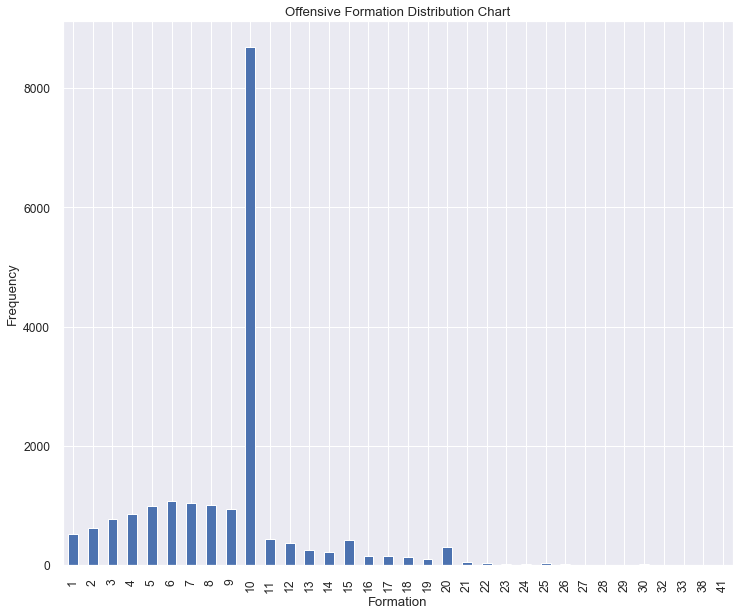

In [574]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("yardsToGo").size().plot(kind='bar')
# Label the axes
plt.xlabel("Formation")
plt.ylabel("Frequency")
plt.title("Offensive Formation Distribution Chart")
# Show the figure
plt.show()

Now reviewing the graph, we can that the most common is 10. This makes the most sense because anytime you get a first down, you are back to having 10 yards to go. 


### Are most of the 10 yards to go on first down?
We will use the play result to figure what down it usual is when there are 10 yards to go. This feature may not even be included in our models.

In [575]:
down = df_copy1.loc[(df_copy1['down'] == 1)]
down_10 = df_copy1.loc[(df_copy1['down'] == 1)& (df_copy1['yardsToGo'] == 10)]
print(down.down.value_counts())
to_go = down_10.down.value_counts().sum()/ down.down.value_counts().sum() 
print("%.2f%% of all plays with 10 yards to go are first downs." % (to_go *100))
# We plan to do more analysis here, how many yards to go are there on 2nd down or 3rd down usually? 
# There is some additional work to be done here. 

1    7405
Name: down, dtype: int64
89.70% of all plays with 10 yards to go are first downs.


This is not surprising, if its first down then the offense is 10 yards to go. We can do more analysis here, how many yards to go are there on 2nd down or 3rd down usually? 


###  Feature 3 Play type (with missing values) analysis and distributions

In [576]:
df_copy1['playType']

0           play_type_pass
1           play_type_pass
2           play_type_pass
3           play_type_pass
4           play_type_pass
               ...        
19234    play_type_unknown
19235    play_type_unknown
19236    play_type_unknown
19237    play_type_unknown
19238    play_type_unknown
Name: playType, Length: 19239, dtype: object

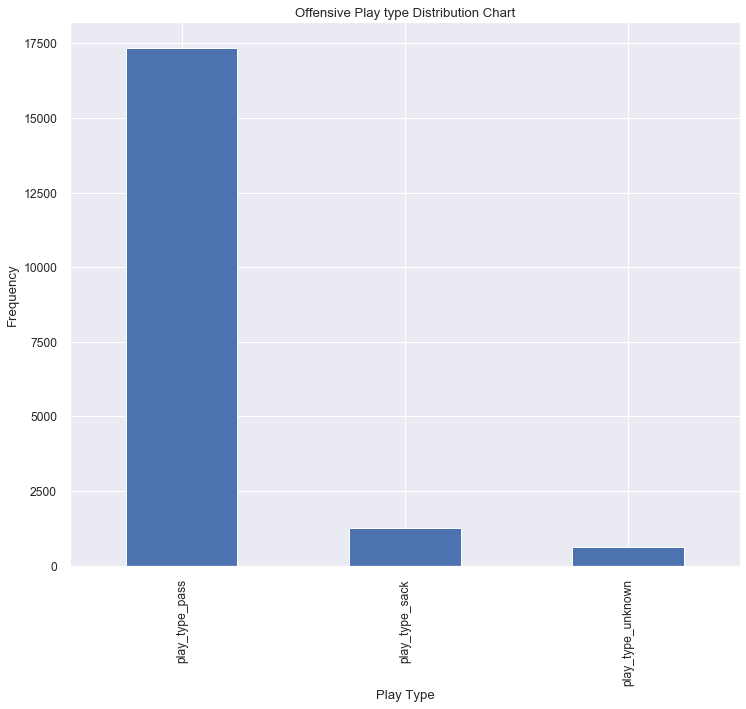

In [577]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("playType").size().plot(kind='bar')
# Label the axes
plt.xlabel("Play Type")
plt.ylabel("Frequency")
plt.title("Offensive Play type Distribution Chart")
# Show the figure
plt.show()

### Play Type Analysis
This feature will be removed from the research, all the plays in the data that we have are passing plays, even if they end in a sack. We determined unknown plays were passing plays earlier and the distribution indicates that there is no variation. Sacks are a result of a failed passing play. 

### Feature 4: Offensive formation (with missing values) analysis and distributions

In [578]:
df_copy1["offenseFormation"]

0            I_FORM
1        SINGLEBACK
2           SHOTGUN
3           SHOTGUN
4           SHOTGUN
            ...    
19234    SINGLEBACK
19235       SHOTGUN
19236       SHOTGUN
19237    SINGLEBACK
19238       SHOTGUN
Name: offenseFormation, Length: 19239, dtype: object

In [579]:
df_copy1["offenseFormation"].value_counts()


SHOTGUN       12627
SINGLEBACK     2790
EMPTY          2428
I_FORM          915
PISTOL          251
JUMBO            51
WILDCAT          36
Name: offenseFormation, dtype: int64

Reviewing the value counts we can already see the variation is higher than most of the other features 

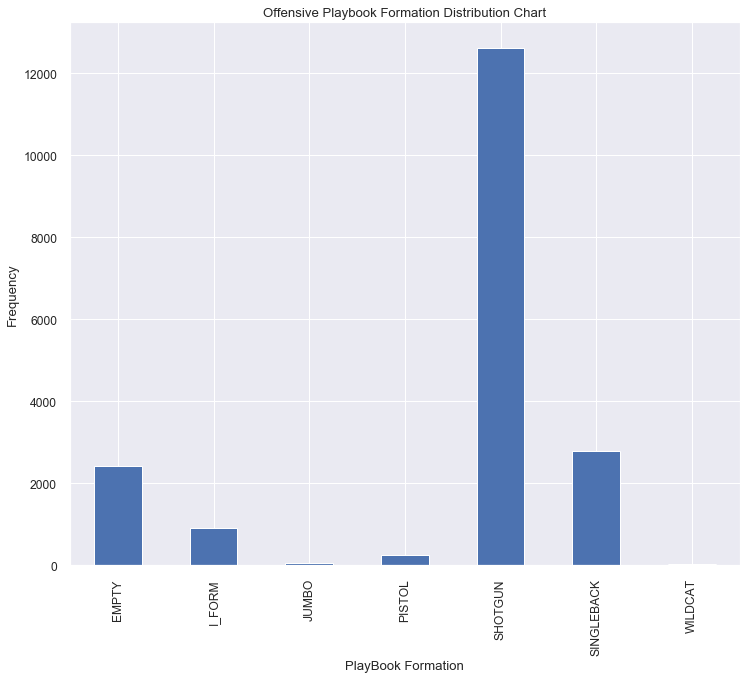

In [580]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("offenseFormation").size().plot(kind='bar')
# Label the axes
plt.xlabel("PlayBook Formation")
plt.ylabel("Frequency")
plt.title("Offensive Playbook Formation Distribution Chart")
# Show the figure
plt.show()

### Offensive Formation feature Analysis
This is no surprise as we can see in our earlier methods we determined that shotgun is the most common pass play formation and a shotgun formation consist of 1 rb 1 TE and 3 WR, which is the most common value in personnelO feature. These two features are identical and we will be using only one feature to represent the offensive formation. 



### Feature 5 Defenders In The Box (with missing values) analysis and distributions

In [581]:
df_copy1['defendersInTheBox']

0        7.0
1        7.0
2        6.0
3        6.0
4        8.0
        ... 
19234    7.0
19235    6.0
19236    6.0
19237    7.0
19238    6.0
Name: defendersInTheBox, Length: 19239, dtype: float64

In [582]:
df_copy1["defendersInTheBox"].value_counts()

6.0     8825
7.0     4401
5.0     3450
4.0     1170
8.0     1059
3.0      133
9.0       77
10.0      31
11.0      15
2.0       14
1.0        2
Name: defendersInTheBox, dtype: int64

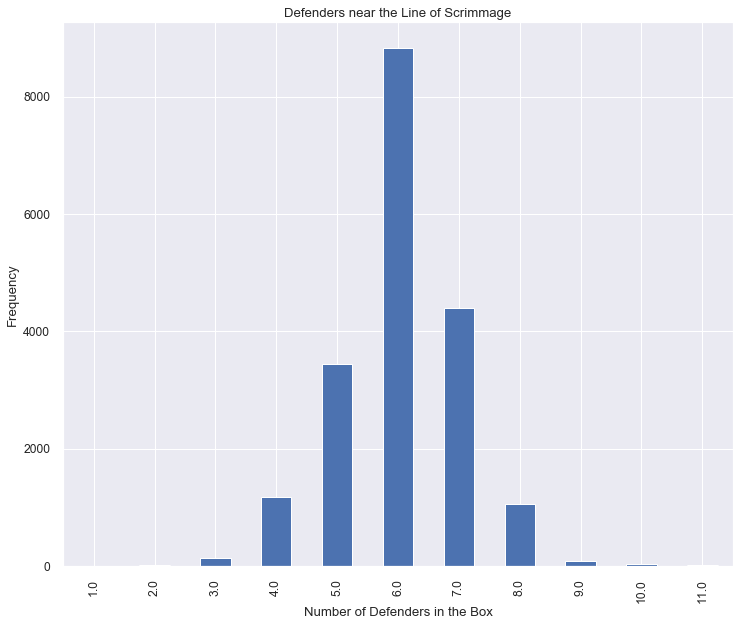

In [583]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("defendersInTheBox").size().plot(kind='bar')
# Label the axes
plt.xlabel("Number of Defenders in the Box")
plt.ylabel("Frequency")
plt.title("Defenders near the Line of Scrimmage")
# Show the figure
plt.show()

### Defenders in the box Analysis
There are usually between 5-7 defenders near the line of scrimmage, with 6 being the most common. What would be interesting is to see if the number of defenders in the box correlates/has a relationship with sacks. 

### Defenders in the box == more pass rushers? what about sacks? 
In the next analysis we are looking to look at what defensive personnel data points have an impact and potential relationship with the result of the play.

### Feature 6: number Of Pass Rushers (with missing values) analysis and distributions

In [584]:
df_copy1['numberOfPassRushers']

0        4.0
1        4.0
2        4.0
3        5.0
4        6.0
        ... 
19234    NaN
19235    NaN
19236    NaN
19237    NaN
19238    NaN
Name: numberOfPassRushers, Length: 19239, dtype: float64

In [585]:
df_copy1['numberOfPassRushers'].value_counts()

4.0     11521
5.0      3646
3.0      1597
6.0      1136
2.0       253
7.0       242
0.0       106
1.0        73
8.0        30
10.0        1
9.0         1
Name: numberOfPassRushers, dtype: int64

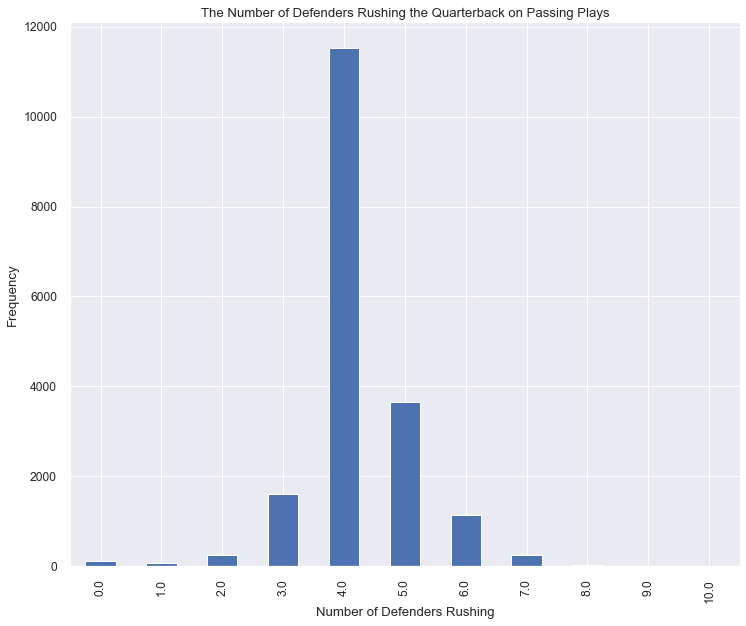

In [586]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("numberOfPassRushers").size().plot(kind='bar')
# Label the axes
plt.xlabel("Number of Defenders Rushing")
plt.ylabel("Frequency")
plt.title("The Number of Defenders Rushing the Quarterback on Passing Plays")
# Show the figure
plt.show()

### Feature Number of Pass Rushers Analysis
We thought it would be interesting to see if there are any relationships between number of rushers, number of defenders in the box and a sack play result. Most NFL coaches either have 3 or 4 linemen on the defensive line. I would consider a 5 rushers to be a blitz. 

### Feature 6: Defensive Formation (with missing values) analysis and distributions

In [587]:
df_copy1['personnelD']


0        4 DL, 2 LB, 5 DB
1        4 DL, 2 LB, 5 DB
2        4 DL, 2 LB, 5 DB
3        4 DL, 1 LB, 6 DB
4        6 DL, 3 LB, 2 DB
               ...       
19234    2 DL, 4 LB, 5 DB
19235    2 DL, 4 LB, 5 DB
19236    1 DL, 5 LB, 5 DB
19237    2 DL, 3 LB, 6 DB
19238    4 DL, 1 LB, 6 DB
Name: personnelD, Length: 19239, dtype: object

In [588]:
df_copy1['personnelD'].value_counts()

4 DL, 2 LB, 5 DB                    6652
3 DL, 3 LB, 5 DB                    3103
4 DL, 3 LB, 4 DB                    2407
2 DL, 4 LB, 5 DB                    2109
4 DL, 1 LB, 6 DB                    1104
3 DL, 2 LB, 6 DB                    1047
2 DL, 3 LB, 6 DB                     917
3 DL, 4 LB, 4 DB                     743
1 DL, 4 LB, 6 DB                     311
1 DL, 5 LB, 5 DB                     266
1 DL, 3 LB, 7 DB                     102
5 DL, 2 LB, 4 DB                      93
3 DL, 1 LB, 7 DB                      82
2 DL, 2 LB, 7 DB                      71
0 DL, 4 LB, 7 DB                      32
4 DL, 0 LB, 7 DB                      24
4 DL, 4 LB, 3 DB                      23
0 DL, 5 LB, 6 DB                      17
5 DL, 3 LB, 3 DB                      14
5 DL, 1 LB, 5 DB                      13
6 DL, 4 LB, 1 DB                      12
6 DL, 3 LB, 2 DB                      12
0 DL, 6 LB, 5 DB                       6
2 DL, 3 LB, 5 DB, 1 WR                 4
4 DL, 5 LB, 2 DB

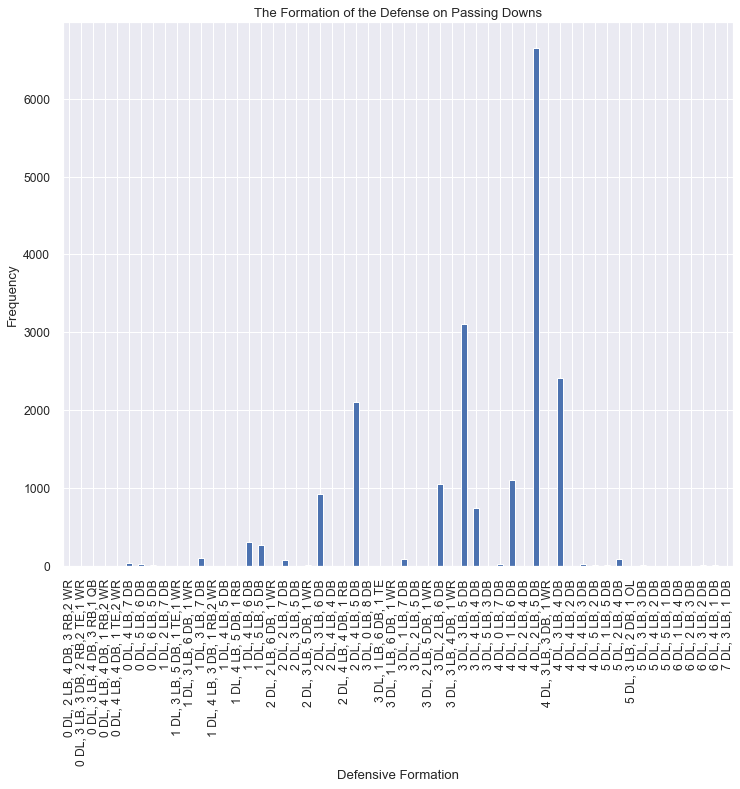

In [589]:
# visual of distribution
plt.figure(figsize=(12,10))
df_copy1.groupby("personnelD").size().plot(kind='bar')
# Label the axes
plt.xlabel("Defensive Formation")
plt.ylabel("Frequency")
plt.title("The Formation of the Defense on Passing Downs")
# Show the figure
plt.show()

### Feature Defensive Formation Analysis
In the bar chart we can conclude that there are in fact more defensive formations than offensive formation (it's not even close). Although the variation is more than the offensive formation we can see that 4DL 2 LB and 5 DB is the most common formation. I would say that this is a cover 3 with an extra corner in the slot. Knowing this data consists of passing plays it would make sense that that the defense would have an extra corner out. A quick glance analysis I would say that defenses play 5 DBs when the offense is in shotgun. 

#### Question: Do shotgun plays == 5 or more DBs defensive formation? Defenders in the box == more pass rushers? what about sacks? 

See if there is a relationship via the analysis below. 

In [590]:
df_copy1

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True


In [591]:
sack = df_copy1.loc[(df_copy['playType'] == "play_type_sack")]
sack

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
13,2018090600,776,(3:06) (Shotgun) N.Foles sacked at PHI 36 for ...,1,1,10,PHI,play_type_sack,PHI,43,...,0.0,03:06:00,53.0,NaN,NaN,S,-7,-7,-0.980175,False
14,2018090600,839,(1:21) (Shotgun) N.Foles FUMBLES (Aborted) at ...,1,3,12,PHI,play_type_sack,PHI,41,...,0.0,01:21:00,51.0,NaN,NaN,S,-6,-6,-2.092108,False
27,2018090600,1568,(2:58) (Shotgun) M.Ryan sacked at PHI 34 for -...,2,3,8,ATL,play_type_sack,PHI,25,...,3.0,02:58:00,85.0,NaN,NaN,S,-9,-9,-1.675260,False
66,2018090600,3815,(6:31) (Shotgun) M.Ryan sacked at ATL 10 for -...,4,2,25,ATL,play_type_sack,ATL,18,...,10.0,06:31:00,92.0,NaN,NaN,S,-3,-3,-1.015119,False
75,2018090600,4239,(1:50) (Shotgun) M.Ryan sacked at PHI 40 for -...,4,2,10,ATL,play_type_sack,PHI,33,...,18.0,01:50:00,43.0,NaN,NaN,S,-7,-7,-0.982487,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18579,2018122201,2704,(6:28) (Shotgun) L.Jackson sacked at LAC 38 fo...,3,2,7,BAL,play_type_sack,LAC,37,...,10.0,06:28:00,47.0,NaN,NaN,S,-1,-1,-0.752832,False
18581,2018122201,2853,(4:25) (Shotgun) P.Rivers sacked at LAC 12 for...,3,2,16,LAC,play_type_sack,LAC,19,...,10.0,04:25:00,29.0,NaN,NaN,S,-7,-7,-1.590580,False
18592,2018122201,3404,(9:45) (Shotgun) P.Rivers sacked at LAC 38 for...,4,2,6,LAC,play_type_sack,LAC,46,...,10.0,09:45:00,64.0,NaN,NaN,S,-8,-8,-1.324081,False
18597,2018122201,3565,(5:29) (Shotgun) P.Rivers sacked at BLT 40 for...,4,3,5,LAC,play_type_sack,BAL,29,...,10.0,05:29:00,39.0,NaN,NaN,S,-11,-11,-2.272758,False


In [592]:
sack.numberOfPassRushers.value_counts()

4.0     711
5.0     333
6.0     130
3.0      48
7.0      31
2.0       3
8.0       2
0.0       1
10.0      1
Name: numberOfPassRushers, dtype: int64

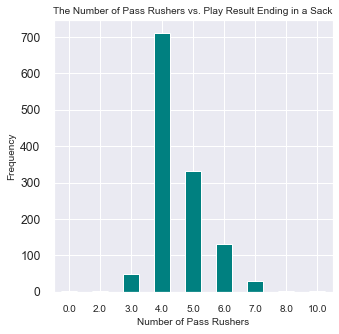

In [593]:
plt.rcParams['figure.figsize'] = (5, 5)
fig, axes = plt.subplots()

sack.groupby("numberOfPassRushers").size().plot(kind='bar', color="teal")
plt.xlabel("Number of Pass Rushers", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation = 0, fontsize=10)
plt.title("The Number of Pass Rushers vs. Play Result Ending in a Sack", fontsize=10)

plt.show()

In [594]:
sack.passResult.value_counts() #Done to make sure there were no mistakes in the data

S    1260
Name: passResult, dtype: int64

In [595]:
rush = df_copy1.loc[(df_copy['numberOfPassRushers'] == 6)]
rush

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
59,2018090600,3257,(:20) (Shotgun) M.Ryan pass incomplete short r...,3,1,10,ATL,play_type_pass,PHI,32,...,10.0,00:20:00,78.0,NaN,NaN,I,0,0,-0.302429,False
85,2018090901,96,(13:37) (Shotgun) B.Roethlisberger pass incomp...,1,3,2,PIT,play_type_pass,PIT,33,...,0.0,13:37:00,43.0,NaN,NaN,I,0,0,-1.695070,False
95,2018090901,613,(6:24) (Shotgun) B.Roethlisberger pass incompl...,1,1,10,PIT,play_type_pass,NaN,50,...,0.0,06:24:00,60.0,NaN,NaN,I,0,0,-0.478473,False
129,2018090901,2972,(2:06) (Shotgun) B.Roethlisberger pass short l...,3,3,4,PIT,play_type_pass,PIT,20,...,7.0,02:06:00,30.0,NaN,NaN,C,6,6,1.981270,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18530,2018122200,3020,(9:02) (Shotgun) J.Johnson pass incomplete sho...,4,2,9,WAS,play_type_pass,TEN,18,...,12.0,09:02:00,28.0,NaN,NaN,I,0,0,-0.413786,False
18531,2018122200,3042,(8:56) (Shotgun) J.Johnson sacked at TEN 28 fo...,4,3,9,WAS,play_type_sack,TEN,18,...,12.0,08:56:00,28.0,NaN,NaN,S,-10,-10,-1.802142,False
18534,2018122200,3277,(4:35) B.Gabbert pass short right to M.Pruitt ...,4,1,2,TEN,play_type_pass,WAS,2,...,12.0,04:35:00,108.0,NaN,NaN,C,2,2,1.217171,False
18536,2018122200,3477,(2:00) (Shotgun) J.Johnson pass short left to ...,4,2,8,WAS,play_type_pass,TEN,49,...,19.0,02:00:00,59.0,NaN,NaN,C,5,5,-0.347317,False


In [596]:
#print(rush.passResult.value_counts())
#com = rush.loc[(rush['passResult'] == "C")]
#print("When rushing 6 defenders the QB is %.2f%%", (com/rush.shape[0]*100),
#     "more likily to complete a pass")

In [597]:
rush1 = df_copy1.loc[(df_copy['numberOfPassRushers'] == 5)]
rush1

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
13,2018090600,776,(3:06) (Shotgun) N.Foles sacked at PHI 36 for ...,1,1,10,PHI,play_type_sack,PHI,43,...,0.0,03:06:00,53.0,NaN,NaN,S,-7,-7,-0.980175,False
18,2018090600,1037,(12:53) (Shotgun) N.Foles pass short left to N...,2,3,7,PHI,play_type_pass,PHI,43,...,0.0,12:53:00,67.0,NaN,NaN,C,10,10,2.044063,False
27,2018090600,1568,(2:58) (Shotgun) M.Ryan sacked at PHI 34 for -...,2,3,8,ATL,play_type_sack,PHI,25,...,3.0,02:58:00,85.0,NaN,NaN,S,-9,-9,-1.675260,False
38,2018090600,2094,(:22) (Shotgun) N.Foles pass incomplete deep r...,2,2,5,PHI,play_type_pass,PHI,18,...,3.0,00:22:00,92.0,NaN,NaN,I,0,0,-0.231391,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18595,2018122201,3493,(7:35) (Shotgun) P.Rivers pass short right to ...,4,3,6,LAC,play_type_pass,BAL,41,...,10.0,07:35:00,51.0,NaN,NaN,C,7,7,1.453092,False
18599,2018122201,3745,(2:54) (Shotgun) P.Rivers pass short left to A...,4,1,20,LAC,play_type_pass,BAL,49,...,10.0,02:54:00,59.0,NaN,NaN,C,11,-51,-9.487679,False
18600,2018122201,3817,(2:40) (Shotgun) P.Rivers pass short left to K...,4,1,10,LAC,play_type_pass,LAC,25,...,10.0,02:40:00,85.0,NaN,NaN,C,8,8,0.004526,False
18602,2018122201,3884,(2:00) (Shotgun) P.Rivers pass short left to K...,4,1,10,LAC,play_type_pass,LAC,40,...,10.0,02:00:00,70.0,NaN,NaN,C,17,17,0.712741,False


### Feature 7: Play Result (with missing values) analysis and distributions
Our playresult variable that present the number of net yards gained in each play

In [598]:
print("Describe Play Result")
print(df['playResult'].describe())

Describe Play Result
count    19239.000000
mean         6.469047
std         10.566605
min        -78.000000
25%          0.000000
50%          4.000000
75%         11.000000
max         97.000000
Name: playResult, dtype: float64


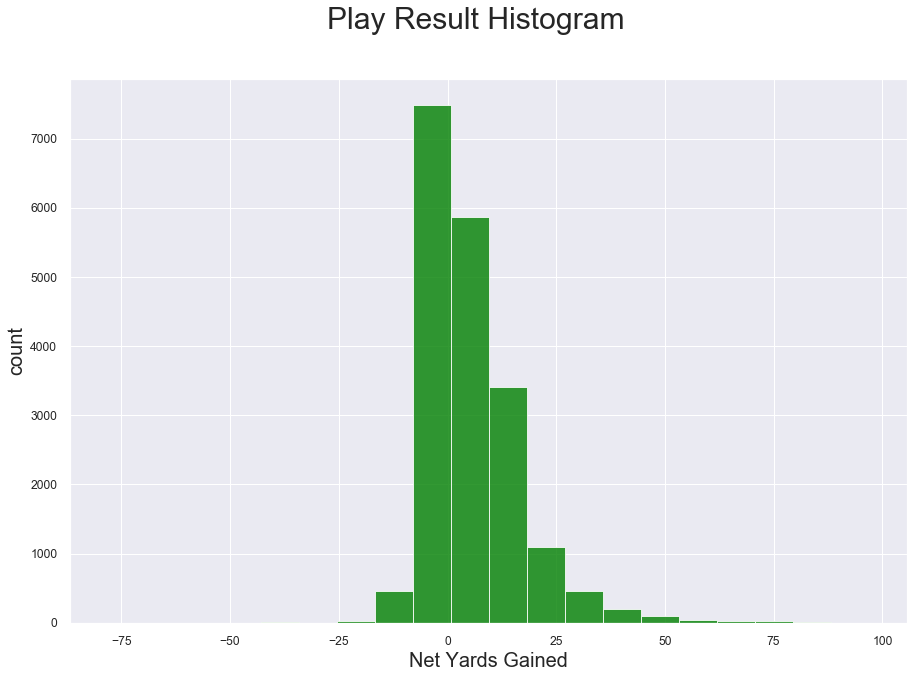

In [599]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots()


plt.hist(df['playResult'], bins=20, color="green", alpha=0.8)
plt.xlabel("Net Yards Gained", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.suptitle("Play Result Histogram", fontsize=30)

plt.show()

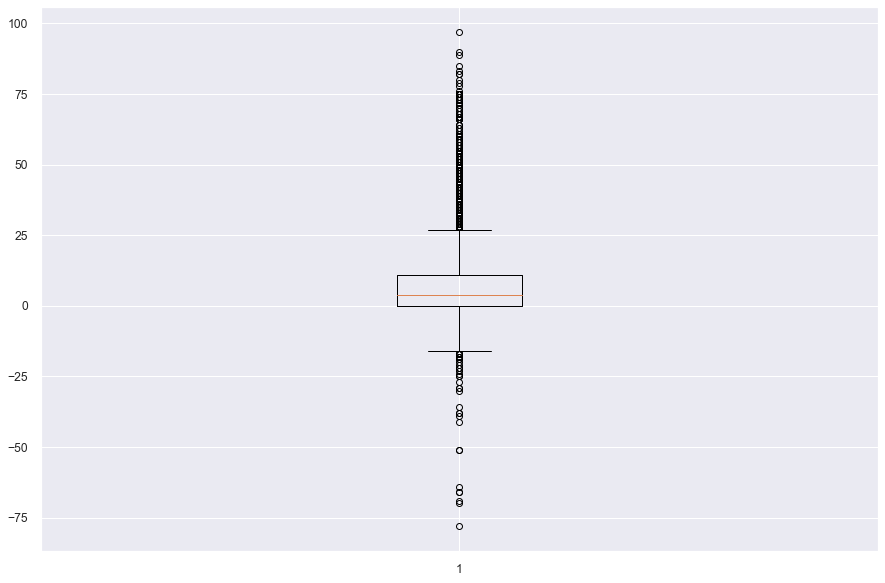

In [600]:
plt.boxplot(df['playResult'])

plt.show()
    

In [601]:
print("Describe Pass Result")
print(df['passResult'].describe())

Describe Pass Result
count     19237
unique        5
top           C
freq      11370
Name: passResult, dtype: object


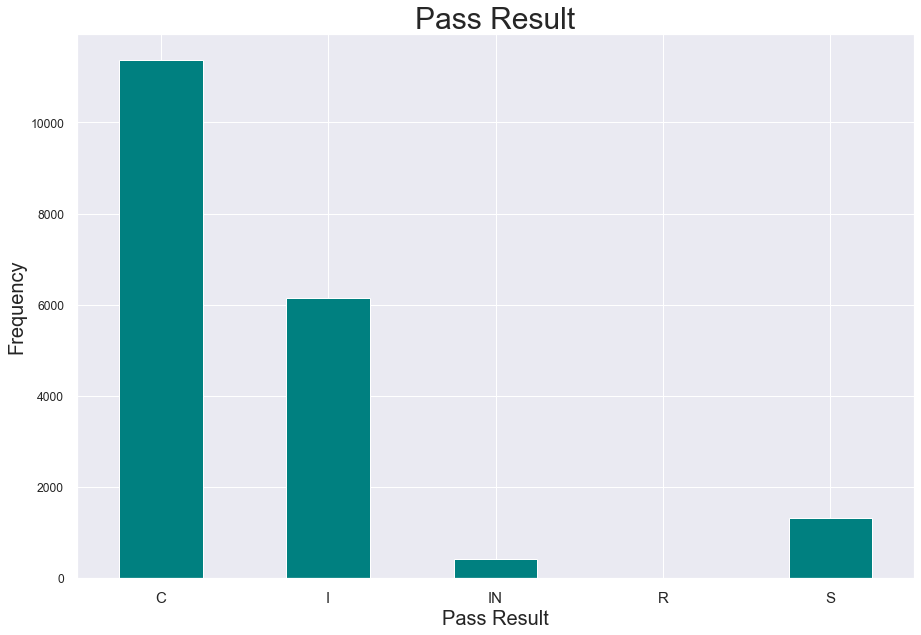

In [602]:
df.groupby("passResult").size().plot(kind='bar', color="teal")
plt.xlabel("Pass Result", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(rotation = 0, fontsize=15)
plt.title("Pass Result", fontsize=30)

plt.show()

C:\Users\Gloria\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


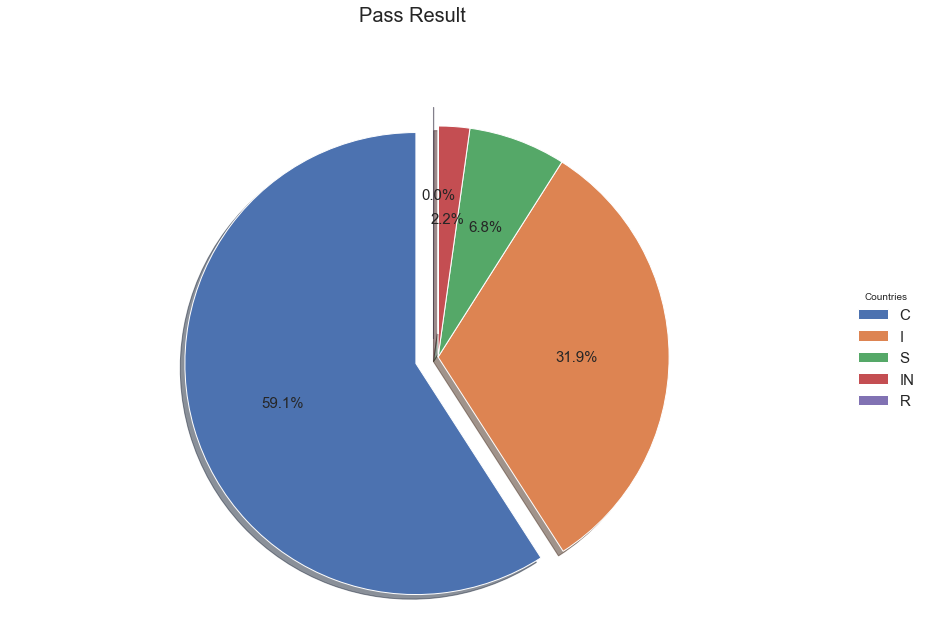

In [603]:
explode = (0.1, 0, 0, 0, 0.1)
plt.pie(df.passResult.value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 15}, pctdistance=0.6, explode=explode)
plt.legend(df.passResult.value_counts().index, labels= df.passResult.value_counts().index, title="Countries",loc="center left", bbox_to_anchor=(1.0, 0, 0.5, 1), fontsize=15)
plt.axis('equal') 
plt.suptitle('Pass Result', fontsize = 20)
plt.show()

Text(0.5, 0.98, 'Pass Result and Play result')

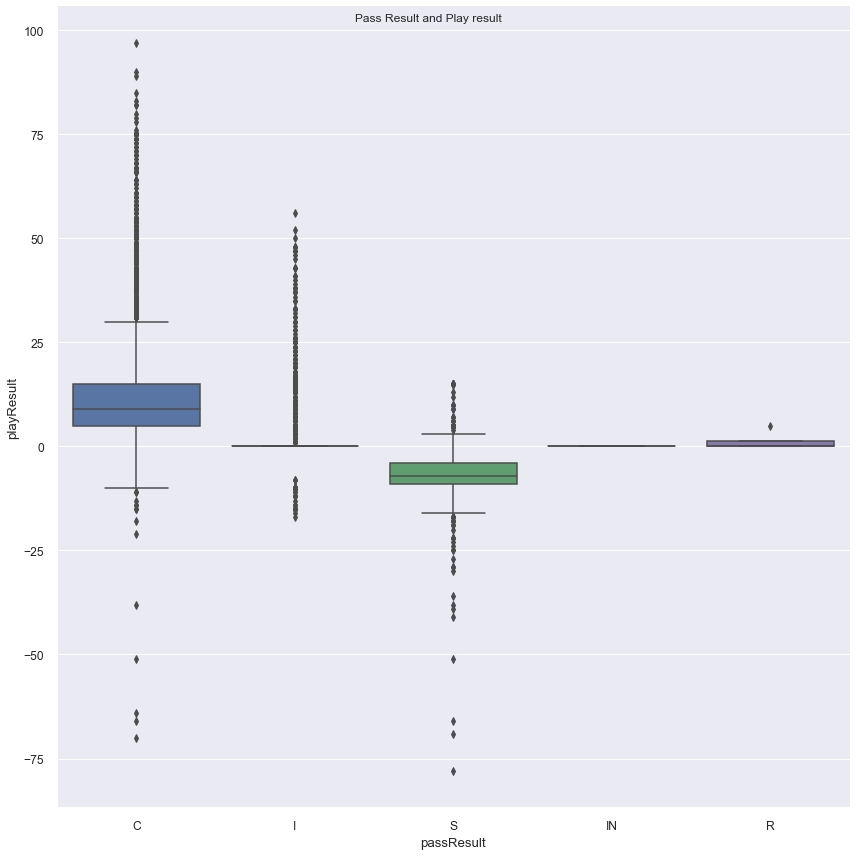

In [604]:
ax = sns.catplot(x='passResult', y='playResult', kind = 'box', data = df, height=12, aspect=1)
ax.fig.suptitle('Pass Result and Play result')

To begin our analysis, we will use an l apply to add an outcome column to the data set. This is the column we will use as our dependent variable. If the play results in any sort of positive yardage we counted that as a success 

In [605]:
df['outcome'] = df['playResult'].apply(lambda c: 1 if c > 0 else 0)

df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,outcome
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,1
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,0
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,0
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,1
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,0


Text(0.5, 1.0, 'Outcome Counts')

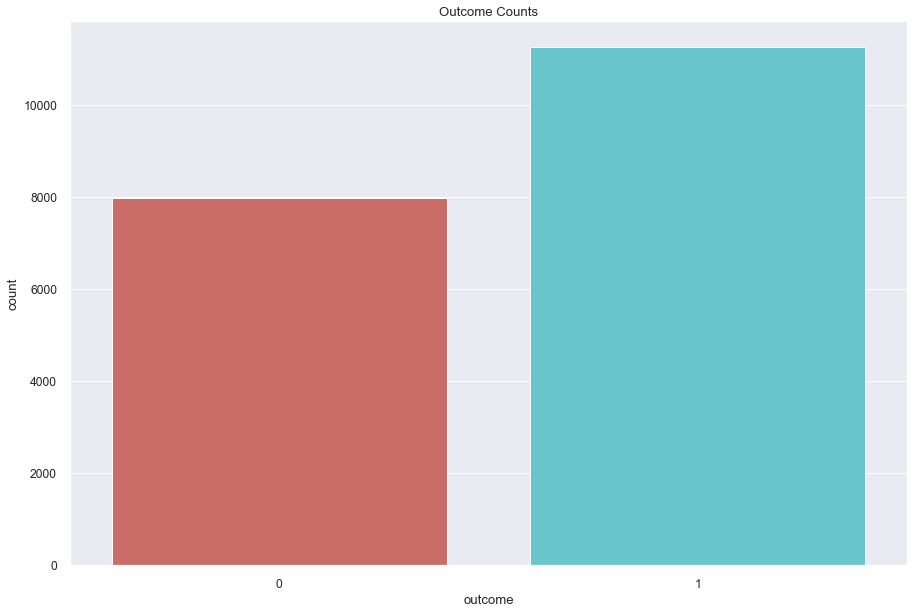

In [606]:
sns.countplot(x='outcome', data=df, palette = 'hls').set_title('Outcome Counts')

Text(0.5, 0.98, 'Pass Result and Play result')

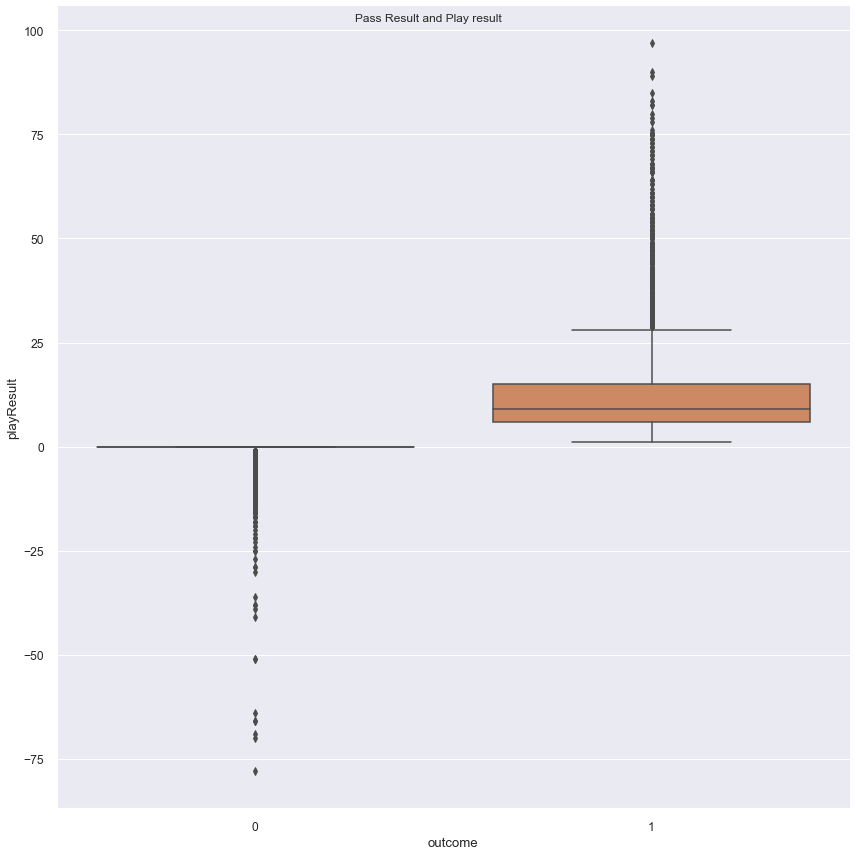

In [607]:
ax = sns.catplot(x='outcome', y='playResult', kind = 'box', data = df, height=12, aspect=1)
ax.fig.suptitle('Pass Result and Play result')

As expected Incomplete passes have a negative or 0 play result. We can also see that Complete passes have a Play Result between 1 and aproximately 15 yards

# Feature Engineering
Converting values of personnelO and personnelD

In [608]:
df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'outcome'],
      dtype='object')

In [609]:
df['personnelO'].value_counts()

1 RB, 1 TE, 3 WR                            13716
1 RB, 2 TE, 2 WR                             2737
2 RB, 1 TE, 2 WR                             1083
1 RB, 3 TE, 1 WR                              406
1 RB, 0 TE, 4 WR                              273
0 RB, 1 TE, 4 WR                              173
2 RB, 2 TE, 1 WR                              165
2 RB, 0 TE, 3 WR                              148
6 OL, 1 RB, 1 TE, 2 WR                        111
2 QB, 1 RB, 1 TE, 2 WR                         56
0 RB, 2 TE, 3 WR                               51
6 OL, 1 RB, 2 TE, 1 WR                         48
0 RB, 0 TE, 5 WR                               36
6 OL, 1 RB, 0 TE, 3 WR                         29
6 OL, 2 RB, 2 TE, 0 WR                         21
3 RB, 1 TE, 1 WR                               19
3 RB, 0 TE, 2 WR                               13
2 RB, 3 TE, 0 WR                               12
6 OL, 2 RB, 1 TE, 1 WR                         11
6 OL, 2 RB, 0 TE, 2 WR                         10


# Removing special teams plays 
(plays that occur less than 10 times have a defensive player in the formation meaning it is special teams play) 

In [610]:
# Removing all the values that only show up 10 or less times
value_counts = df['personnelO'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 10].index

# Keep rows where the city column is not in to_remove
df = df[~df.personnelO.isin(to_remove)]
df.personnelO.value_counts()

1 RB, 1 TE, 3 WR          13716
1 RB, 2 TE, 2 WR           2737
2 RB, 1 TE, 2 WR           1083
1 RB, 3 TE, 1 WR            406
1 RB, 0 TE, 4 WR            273
0 RB, 1 TE, 4 WR            173
2 RB, 2 TE, 1 WR            165
2 RB, 0 TE, 3 WR            148
6 OL, 1 RB, 1 TE, 2 WR      111
2 QB, 1 RB, 1 TE, 2 WR       56
0 RB, 2 TE, 3 WR             51
6 OL, 1 RB, 2 TE, 1 WR       48
0 RB, 0 TE, 5 WR             36
6 OL, 1 RB, 0 TE, 3 WR       29
6 OL, 2 RB, 2 TE, 0 WR       21
3 RB, 1 TE, 1 WR             19
3 RB, 0 TE, 2 WR             13
2 RB, 3 TE, 0 WR             12
6 OL, 2 RB, 1 TE, 1 WR       11
Name: personnelO, dtype: int64

### The personnelO values and their new representation (dummy value)
1 RB, 1 TE, 3 WR:       a

1 RB, 2 TE, 2 WR:       b

2 RB, 1 TE, 2 WR:       c

1 RB, 3 TE, 1 WR:       d

1 RB, 0 TE, 4 WR:       e

0 RB, 1 TE, 4 WR:       f 

2 RB, 2 TE, 1 WR:       g

2 RB, 0 TE, 3 WR:       h

6 OL, 1 RB, 1 TE, 2 WR: i

2 QB, 1 RB, 1 TE, 2 WR: j

0 RB, 2 TE, 3 WR:       k

6 OL, 1 RB, 2 TE, 1 WR: l     

0 RB, 0 TE, 5 WR:       m          

6 OL, 1 RB, 0 TE, 3 WR: n      

6 OL, 2 RB, 2 TE, 0 WR: o     

3 RB, 1 TE, 1 WR:       p           

3 RB, 0 TE, 2 WR:       q           

2 RB, 3 TE, 0 WR:       r           

6 OL, 2 RB, 1 TE, 1 WR: s   

In [611]:
df['personnelO'] = df['personnelO'].replace(['1 RB, 1 TE, 3 WR','1 RB, 2 TE, 2 WR','2 RB, 1 TE, 2 WR','1 RB, 3 TE, 1 WR',
                                             '1 RB, 0 TE, 4 WR','0 RB, 1 TE, 4 WR','2 RB, 2 TE, 1 WR','2 RB, 0 TE, 3 WR',
                                             '6 OL, 1 RB, 1 TE, 2 WR','2 QB, 1 RB, 1 TE, 2 WR','0 RB, 2 TE, 3 WR',
                                             '6 OL, 1 RB, 2 TE, 1 WR','0 RB, 0 TE, 5 WR','6 OL, 1 RB, 0 TE, 3 WR',
                                             '6 OL, 2 RB, 2 TE, 0 WR','3 RB, 1 TE, 1 WR','3 RB, 0 TE, 2 WR','2 RB, 3 TE, 0 WR',
                                             '6 OL, 2 RB, 1 TE, 1 WR'],['a','b','c','d','e','f','g','h','i','j','k','l','m','n',
                                                                        'o','p','q','r','s'])


C:\Users\Gloria\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [612]:
df["personnelO"].value_counts()

a    13716
b     2737
c     1083
d      406
e      273
f      173
g      165
h      148
i      111
j       56
k       51
l       48
m       36
n       29
o       21
p       19
q       13
r       12
s       11
Name: personnelO, dtype: int64

In [613]:
df["personnelD"].value_counts()

4 DL, 2 LB, 5 DB          6639
3 DL, 3 LB, 5 DB          3098
4 DL, 3 LB, 4 DB          2384
2 DL, 4 LB, 5 DB          2102
4 DL, 1 LB, 6 DB          1104
3 DL, 2 LB, 6 DB          1047
2 DL, 3 LB, 6 DB           912
3 DL, 4 LB, 4 DB           732
1 DL, 4 LB, 6 DB           311
1 DL, 5 LB, 5 DB           266
1 DL, 3 LB, 7 DB           102
5 DL, 2 LB, 4 DB            91
3 DL, 1 LB, 7 DB            82
2 DL, 2 LB, 7 DB            71
0 DL, 4 LB, 7 DB            32
4 DL, 0 LB, 7 DB            24
4 DL, 4 LB, 3 DB            18
0 DL, 5 LB, 6 DB            17
5 DL, 1 LB, 5 DB            13
5 DL, 3 LB, 3 DB            11
6 DL, 4 LB, 1 DB             9
0 DL, 6 LB, 5 DB             6
2 DL, 3 LB, 5 DB, 1 WR       4
6 DL, 3 LB, 2 DB             4
5 DL, 3 LB, 2 DB, 1 OL       3
3 DL, 1 LB, 6 DB, 1 WR       3
4 DL, 5 LB, 2 DB             3
4 DL, 2 LB, 4 DB             2
2 DL, 3 LB, 5 DB             2
3 DL, 1 LB, 6 DB, 1 TE       2
3 DL, 2 LB, 5 DB, 1 WR       2
6 DL, 1 LB, 4 DB             2
3 DL, 0 

In [614]:
# Removing all the values that only show up 10 or less times
value_d = df['personnelD'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
removed = value_d[value_d <= 10].index

# Keep rows where the city column is not in to_remove
df = df[~df.personnelD.isin(removed)]
df.personnelD.value_counts()

4 DL, 2 LB, 5 DB    6639
3 DL, 3 LB, 5 DB    3098
4 DL, 3 LB, 4 DB    2384
2 DL, 4 LB, 5 DB    2102
4 DL, 1 LB, 6 DB    1104
3 DL, 2 LB, 6 DB    1047
2 DL, 3 LB, 6 DB     912
3 DL, 4 LB, 4 DB     732
1 DL, 4 LB, 6 DB     311
1 DL, 5 LB, 5 DB     266
1 DL, 3 LB, 7 DB     102
5 DL, 2 LB, 4 DB      91
3 DL, 1 LB, 7 DB      82
2 DL, 2 LB, 7 DB      71
0 DL, 4 LB, 7 DB      32
4 DL, 0 LB, 7 DB      24
4 DL, 4 LB, 3 DB      18
0 DL, 5 LB, 6 DB      17
5 DL, 1 LB, 5 DB      13
5 DL, 3 LB, 3 DB      11
Name: personnelD, dtype: int64

### The personnelD values and their new representation (dummy value)

4 DL, 2 LB, 5 DB: ab
3 DL, 3 LB, 5 DB: ac
4 DL, 3 LB, 4 DB: ad
2 DL, 4 LB, 5 DB: ae
4 DL, 1 LB, 6 DB: af
3 DL, 2 LB, 6 DB: ag
2 DL, 3 LB, 6 DB: ah
3 DL, 4 LB, 4 DB: ai    
1 DL, 4 LB, 6 DB: aj
1 DL, 5 LB, 5 DB: ak
1 DL, 3 LB, 7 DB: al    
5 DL, 2 LB, 4 DB: am      
3 DL, 1 LB, 7 DB: an    
2 DL, 2 LB, 7 DB: ao     
0 DL, 4 LB, 7 DB: ap     
4 DL, 0 LB, 7 DB: aq     
4 DL, 4 LB, 3 DB: ar     
0 DL, 5 LB, 6 DB: as      
5 DL, 1 LB, 5 DB: at      
5 DL, 3 LB, 3 DB: au      

In [615]:
df['personnelD'] = df['personnelD'].replace(['4 DL, 2 LB, 5 DB','3 DL, 3 LB, 5 DB','4 DL, 3 LB, 4 DB','2 DL, 4 LB, 5 DB',
                                             '4 DL, 1 LB, 6 DB','3 DL, 2 LB, 6 DB','2 DL, 3 LB, 6 DB','3 DL, 4 LB, 4 DB',
                                             '1 DL, 4 LB, 6 DB','1 DL, 5 LB, 5 DB','1 DL, 3 LB, 7 DB','5 DL, 2 LB, 4 DB',
                                             '3 DL, 1 LB, 7 DB','2 DL, 2 LB, 7 DB','0 DL, 4 LB, 7 DB','4 DL, 0 LB, 7 DB',
                                             '4 DL, 4 LB, 3 DB','0 DL, 5 LB, 6 DB','5 DL, 1 LB, 5 DB','5 DL, 3 LB, 3 DB'],
                                            ['ab','ac','ad','ae','af','ag','ah','ai','aj','ak','al','am','an','ao','ap',
                                             'aq','ar','as','at','au'])



In [616]:
df["personnelD"].value_counts()

ab    6639
ac    3098
ad    2384
ae    2102
af    1104
ag    1047
ah     912
ai     732
aj     311
ak     266
al     102
am      91
an      82
ao      71
ap      32
aq      24
ar      18
as      17
at      13
au      11
Name: personnelD, dtype: int64

In [617]:
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,outcome
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,1
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,0
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,0
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,1
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,...,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False,1


### OHE Categorical Variables

In order to run our models and complete out analysis we need to use Pandas Get Dummies to One Hot Encode our categorical variables.

In [618]:
processed = df[['gameId', 'playId', 'quarter', 'down', 'yardsToGo','yardlineNumber', 'defendersInTheBox',
       'numberOfPassRushers', 'preSnapVisitorScore', 'preSnapHomeScore',
       'absoluteYardlineNumber', 'offensePlayResult', 'playResult', 'epa', 'outcome']].copy()

In [619]:
processed.head()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,offensePlayResult,playResult,epa,outcome
0,2018090600,75,1,1,15,20,7.0,4.0,0.0,0.0,90.0,10,10,0.261827,1
1,2018090600,146,1,1,10,39,7.0,4.0,0.0,0.0,49.0,0,0,-0.372360,0
2,2018090600,168,1,2,10,39,6.0,4.0,0.0,0.0,49.0,0,0,-0.702779,0
3,2018090600,190,1,3,10,39,6.0,5.0,0.0,0.0,49.0,33,33,3.047530,1
5,2018090600,320,1,2,8,4,7.0,4.0,0.0,0.0,14.0,4,4,-0.344096,1


In [620]:
cat_columns = ['offenseFormation', 'personnelD', 'personnelO']
cat_dummies = [col for col in processed 
               if "__" in col 
               and col.split("__")[0] in cat_columns]
processed = pd.get_dummies(df, prefix_sep="__",
                              columns=cat_columns)


In [621]:
processed.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,personnelO__j,personnelO__k,personnelO__l,personnelO__m,personnelO__n,personnelO__o,personnelO__p,personnelO__q,personnelO__r,personnelO__s
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0,0,0,0,0,0,0,0,0,0
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0,0,0,0,0,0,0,0,0,0
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0,0,0,0,0,0,0,0,0,0
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0,0,0,0,0,0,0,0,0,0
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,...,0,0,0,0,0,0,0,0,0,0


In [622]:
for col in processed.columns: 
    print(col) 

gameId
playId
playDescription
quarter
down
yardsToGo
possessionTeam
playType
yardlineSide
yardlineNumber
defendersInTheBox
numberOfPassRushers
typeDropback
preSnapVisitorScore
preSnapHomeScore
gameClock
absoluteYardlineNumber
penaltyCodes
penaltyJerseyNumbers
passResult
offensePlayResult
playResult
epa
isDefensivePI
outcome
offenseFormation__EMPTY
offenseFormation__I_FORM
offenseFormation__JUMBO
offenseFormation__PISTOL
offenseFormation__SHOTGUN
offenseFormation__SINGLEBACK
offenseFormation__WILDCAT
personnelD__ab
personnelD__ac
personnelD__ad
personnelD__ae
personnelD__af
personnelD__ag
personnelD__ah
personnelD__ai
personnelD__aj
personnelD__ak
personnelD__al
personnelD__am
personnelD__an
personnelD__ao
personnelD__ap
personnelD__aq
personnelD__ar
personnelD__as
personnelD__at
personnelD__au
personnelO__a
personnelO__b
personnelO__c
personnelO__d
personnelO__e
personnelO__f
personnelO__g
personnelO__h
personnelO__i
personnelO__j
personnelO__k
personnelO__l
personnelO__m
personnelO__n

##### Dropping variables that we are not are interested in analyzing or are not relevant to the problem

In [623]:
processed = processed.drop('playDescription', axis = 1)

In [624]:
processed = processed.drop('possessionTeam', axis = 1)

In [625]:
processed = processed.drop('playType', axis = 1)

In [626]:
processed = processed.drop('yardlineSide', axis = 1)

In [627]:
processed = processed.drop('typeDropback', axis = 1)

In [628]:
processed = processed.drop('gameClock', axis = 1)

In [629]:
processed = processed.drop('penaltyCodes', axis = 1)

In [630]:
processed = processed.drop('penaltyJerseyNumbers', axis = 1)

In [631]:
processed = processed.drop('offensePlayResult', axis = 1)

In [632]:
processed = processed.drop('playResult', axis = 1)

In [633]:
processed = processed.drop('isDefensivePI', axis = 1)

In [634]:
processed = processed.drop('playId', axis = 1)

In [635]:
processed = processed.drop('gameId', axis = 1)

In [636]:
processed.head()

,quarter,down,yardsToGo,yardlineNumber,defendersInTheBox,numberOfPassRushers,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,passResult,...,personnelO__j,personnelO__k,personnelO__l,personnelO__m,personnelO__n,personnelO__o,personnelO__p,personnelO__q,personnelO__r,personnelO__s
0,1,1,15,20,7.0,4.0,0.0,0.0,90.0,C,...,0,0,0,0,0,0,0,0,0,0
1,1,1,10,39,7.0,4.0,0.0,0.0,49.0,I,...,0,0,0,0,0,0,0,0,0,0
2,1,2,10,39,6.0,4.0,0.0,0.0,49.0,I,...,0,0,0,0,0,0,0,0,0,0
3,1,3,10,39,6.0,5.0,0.0,0.0,49.0,C,...,0,0,0,0,0,0,0,0,0,0
5,1,2,8,4,7.0,4.0,0.0,0.0,14.0,C,...,0,0,0,0,0,0,0,0,0,0


In [637]:
for col in processed.columns: 
    print(col) 

quarter
down
yardsToGo
yardlineNumber
defendersInTheBox
numberOfPassRushers
preSnapVisitorScore
preSnapHomeScore
absoluteYardlineNumber
passResult
epa
outcome
offenseFormation__EMPTY
offenseFormation__I_FORM
offenseFormation__JUMBO
offenseFormation__PISTOL
offenseFormation__SHOTGUN
offenseFormation__SINGLEBACK
offenseFormation__WILDCAT
personnelD__ab
personnelD__ac
personnelD__ad
personnelD__ae
personnelD__af
personnelD__ag
personnelD__ah
personnelD__ai
personnelD__aj
personnelD__ak
personnelD__al
personnelD__am
personnelD__an
personnelD__ao
personnelD__ap
personnelD__aq
personnelD__ar
personnelD__as
personnelD__at
personnelD__au
personnelO__a
personnelO__b
personnelO__c
personnelO__d
personnelO__e
personnelO__f
personnelO__g
personnelO__h
personnelO__i
personnelO__j
personnelO__k
personnelO__l
personnelO__m
personnelO__n
personnelO__o
personnelO__p
personnelO__q
personnelO__r
personnelO__s


### Missing values


The criteria used to handling missing values is to drop the rows that has them, this criteria was decided after analysis and conclude that plays with missing data is not a play the we can analyze and does not aport information to the data set

In [638]:
processed = processed.dropna(axis=1)

In [639]:
processed.reset_index()

,index,quarter,down,yardsToGo,yardlineNumber,epa,outcome,offenseFormation__EMPTY,offenseFormation__I_FORM,offenseFormation__JUMBO,...,personnelO__j,personnelO__k,personnelO__l,personnelO__m,personnelO__n,personnelO__o,personnelO__p,personnelO__q,personnelO__r,personnelO__s
0,0,1,1,15,20,0.261827,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,10,39,-0.372360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,2,10,39,-0.702779,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,3,10,39,3.047530,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,2,8,4,-0.344096,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19080,19234,3,2,5,31,0.848703,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19081,19235,4,3,7,37,1.227695,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19082,19236,1,3,4,49,-0.720168,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19083,19237,2,3,1,48,1.336078,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [640]:
#Checking if we have any NaN value left
processed.isnull().sum().sum()

0

## Correlation

We are running a correlation to look at the potential relationships between our variables. We are doing this as a prelude to our feature selection. 

In [641]:
corrdf = processed.corr()

In [642]:
positivec = corrdf[corrdf["outcome"]>=0.1]

In [643]:
positivec

,quarter,down,yardsToGo,yardlineNumber,epa,outcome,offenseFormation__EMPTY,offenseFormation__I_FORM,offenseFormation__JUMBO,offenseFormation__PISTOL,...,personnelO__j,personnelO__k,personnelO__l,personnelO__m,personnelO__n,personnelO__o,personnelO__p,personnelO__q,personnelO__r,personnelO__s
epa,-0.019322,-0.060002,-0.090219,-0.035633,1.000000,0.614096,-0.005187,0.033735,0.009257,0.010157,...,-0.002594,0.004190,0.002130,-0.004030,0.006973,0.014308,-0.001134,0.002466,-0.002359,-0.009858
outcome,-0.015927,-0.064827,0.026809,0.019309,0.614096,1.000000,0.009956,0.013726,-0.014088,0.011106,...,-0.003503,-0.010001,0.003191,0.012075,0.000065,-0.006214,-0.000412,0.001590,-0.017206,-0.015240


In [644]:
negativec = corrdf[corrdf["outcome"]<= -0.1]

In [645]:
negativec

,quarter,down,yardsToGo,yardlineNumber,epa,outcome,offenseFormation__EMPTY,offenseFormation__I_FORM,offenseFormation__JUMBO,offenseFormation__PISTOL,...,personnelO__j,personnelO__k,personnelO__l,personnelO__m,personnelO__n,personnelO__o,personnelO__p,personnelO__q,personnelO__r,personnelO__s


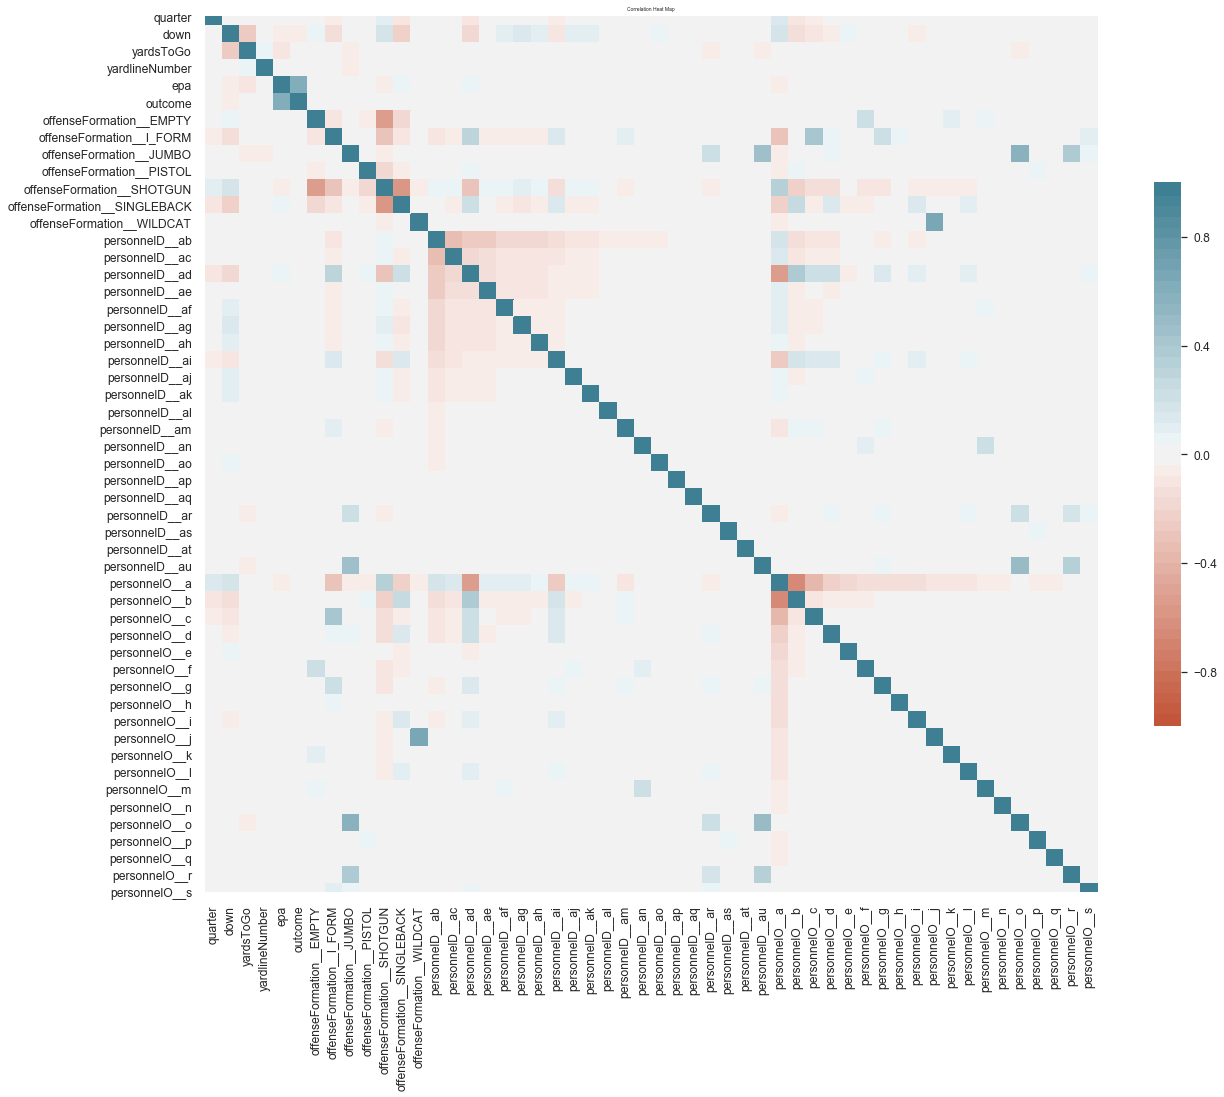

In [646]:
import seaborn as sns

corr = processed.corr(method="pearson")
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale= 1.1)
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=50), square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heat Map', fontsize = 5)
plt.show()

##### Our correlation results were largely inconclusive - this may have to do with the high level of cardinality in our data set. 

#### Split into train and test sets

In [647]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [648]:
data_model_y = processed.replace({'outcome': {1: 'Yard gained', 0: 'No Yard gained'}})['outcome']

In [649]:
X_train, X_val, y_train, y_val = train_test_split(processed.loc[:, processed.columns != 'outcome'],
                                                    data_model_y, test_size =0.7, random_state=22, stratify=processed['outcome'])

##### Based on this, we will move forward with our dataset as is. As our analysis continues to evolve we may choose to drop some columns from our dataset but this is a very preliminary result. 

### Logistic Regression

We are running several models, starting with a logistic regression. 

In [527]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [528]:
model = LogisticRegression()

C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


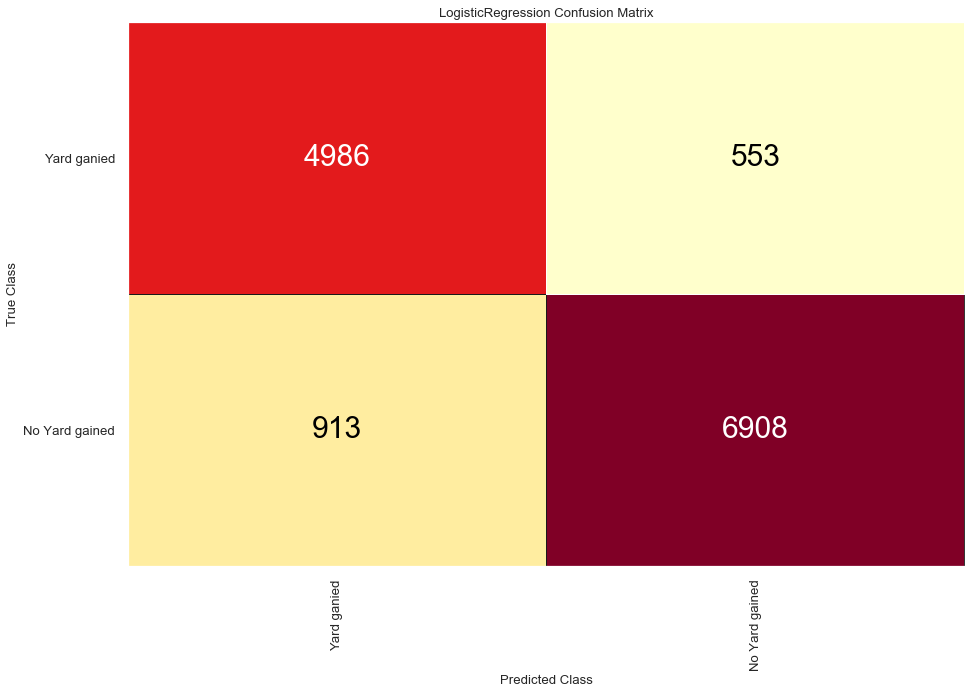

In [529]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.fit(X_train, y_train)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(30)

cm.poof()

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


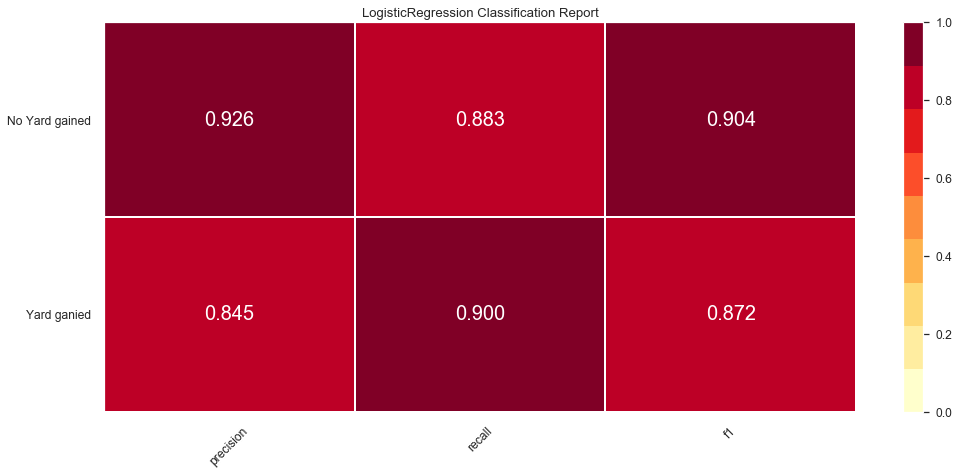

In [530]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()

In [531]:
y_pred = model.predict(X_val)
print("Accuracy of Logistic Regression Model is:\n", accuracy_score(y_val, y_pred))

Accuracy of Logistic Regression Model is:
 0.8902694610778443


### K-Nearest Neightbors

K-nearest neighbor classifier s going to be used in this problem, this algorithm will predict the observation to be in one class or the other one depening on the closer class of other obvservation.

In [532]:
from sklearn.neighbors import KNeighborsClassifier

In [533]:
nearest_n = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)

In [534]:
nearest_n.predict(X_val)

array(['No Yard gained', 'No Yard gained', 'Yard gained', ...,
       'No Yard gained', 'Yard gained', 'No Yard gained'], dtype=object)

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


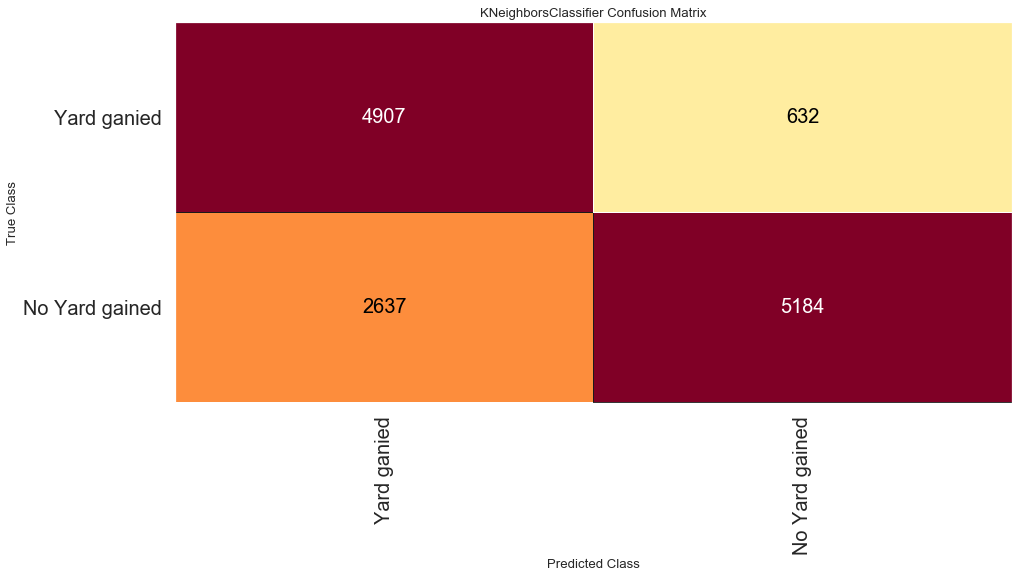

In [535]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(nearest_n, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


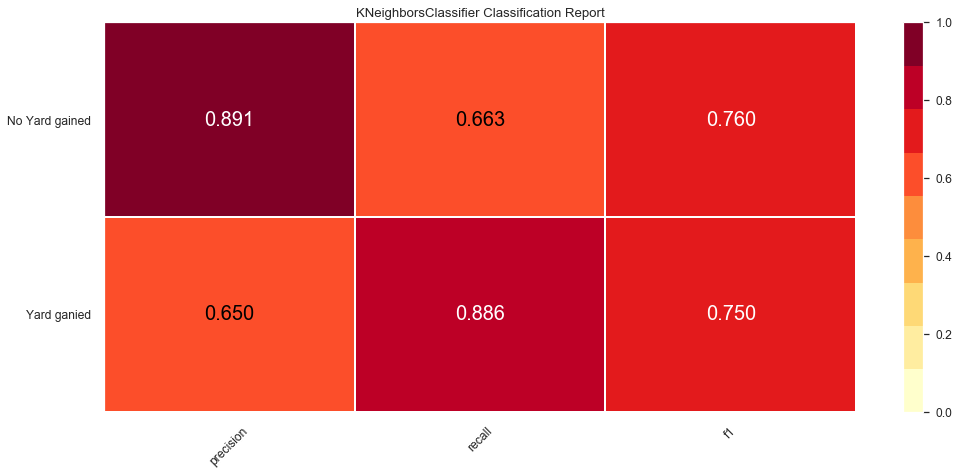

In [536]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(nearest_n, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()


In [537]:
y_pred = model.predict(X_val)

In [538]:
print("Accuracy of K-Nearest Neightbord Model is:\n", accuracy_score(y_val, y_pred))

Accuracy of K-Nearest Neightbord Model is:
 0.8902694610778443


### Random Forest Classifier


Third option a Random Forest Classifier, this model will be used because is another option for classification problem.

In [539]:
from sklearn.ensemble import RandomForestClassifier

In [540]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train, y_train)

C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


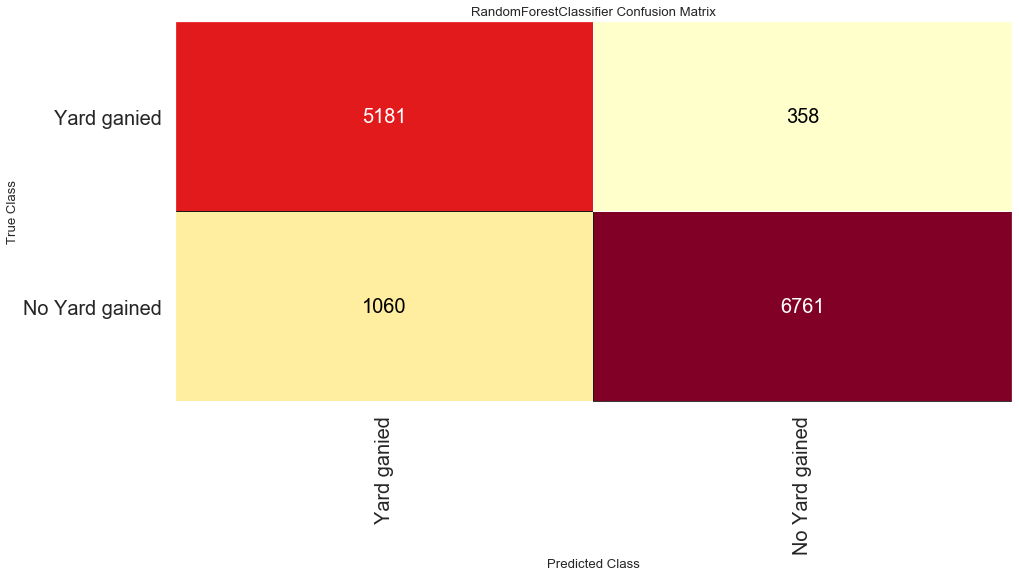

In [541]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:

    cm.poof()

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


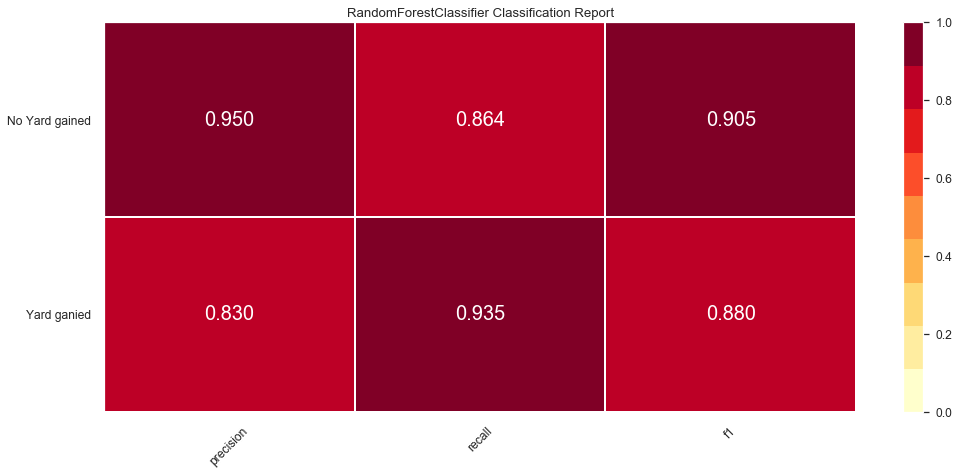

In [542]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()

In [543]:
y_pred = model.predict(X_val)
print("Accuracy of Logistic Regression Model is:\n", accuracy_score(y_val, y_pred))

Accuracy of Logistic Regression Model is:
 0.8938622754491018


# Conclusion/Discussion

Our preliminary conclusions indicate that none of our models are currently working all that great. As we continue to optimize our features and our models we anticipate that we will start to get better results. At this time our Logistic Regression Model is working the best. 

# References 

[1] Statista. (2020). Total revenue of all National Football League teams from 2001 to 2019 https://www.statista.com/statistics/193457/total-league-revenue-of-the-nfl-since-2005/

[2] Aubrey, J. (2020, June 9). The Future of NFL Data Analytics https://www.samford.edu/sports-analytics/fans/2020/The-Future-of-NFL-Data-Analytics)

[3] Loyola, K. (2020, September 16). The true story behind Tom Brady and the Deflategate scandal. Bolavip US. https://us.bolavip.com/nfl/the-true-story-behind-tom-brady-and-the-deflategate-scandal-20200915-0014.html

[4] NFL Big Data Bowl 2021. (n.d.). Retrieved December 12, 2020, from https://www.kaggle.com/c/nfl-big-data-bowl-2021/rules

[5] Brownlee, J. (2020, August 20). SMOTE for Imbalanced Classification with Python. Retrieved December 12, 2020, from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


### Chi-Square Test

To finalize our feature selection we are using a Chi Square Test. 

In [398]:
X_train = X_train.drop('epa', axis = 1)
X_val = X_val.drop('epa', axis = 1)


In [399]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_train, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)


6 selected features
['down', 'yardsToGo', 'yardlineNumber', 'personnelD__ad', 'personnelD__al', 'personnelO__r']


In [400]:
X_train = X_train[chi_feature]
X_val = X_val[chi_feature]

In [401]:
model = LogisticRegression()

C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


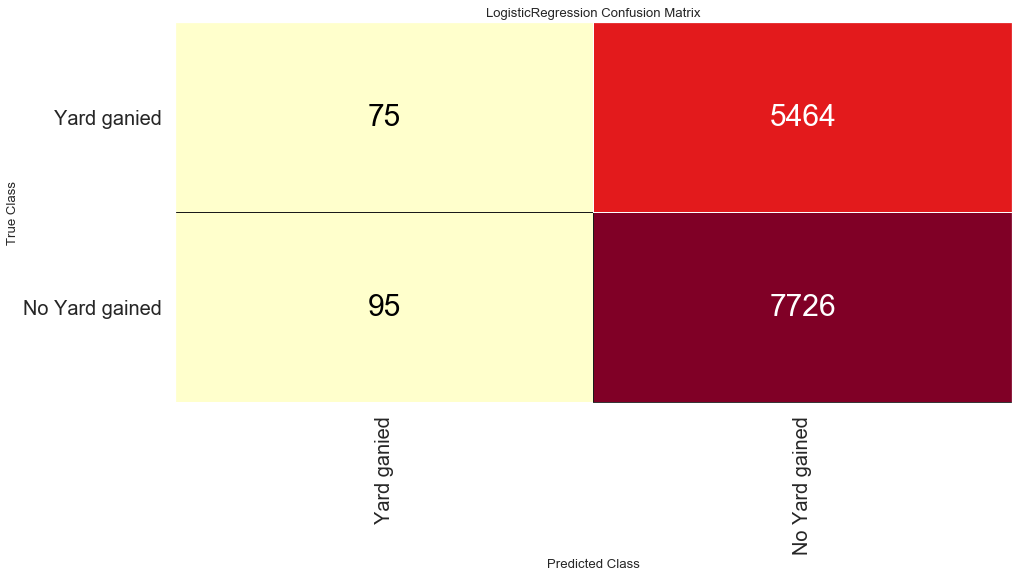

In [402]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.fit(X_train, y_train)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(30)

cm.poof()

In [403]:
y_pred = model.predict(X_val)
print("Accuracy of Logistic Regression Model is:\n", accuracy_score(y_val, y_pred))

Accuracy of Logistic Regression Model is:
 0.5839071856287426


In [404]:
nearest_n = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


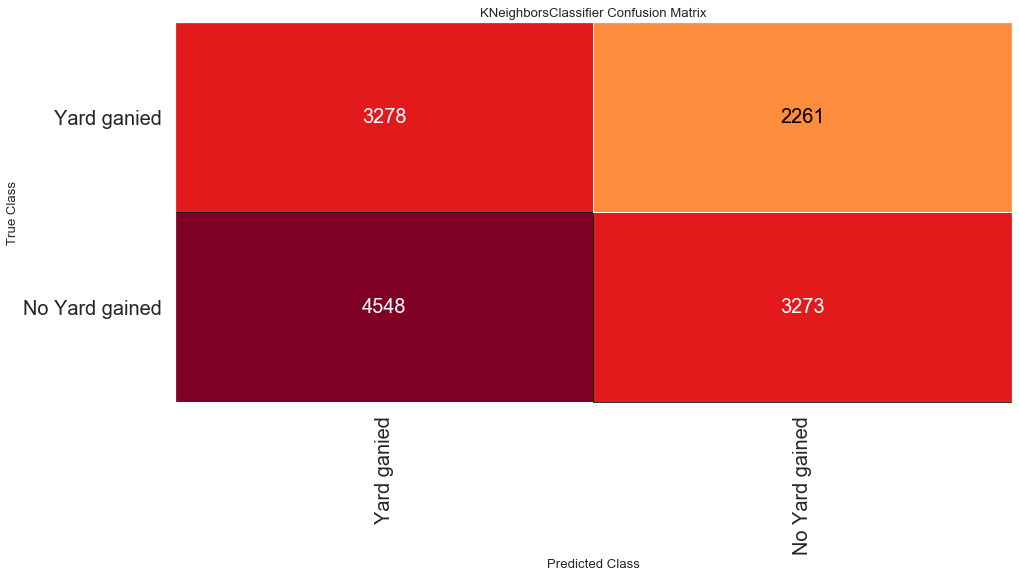

In [405]:
nearest_n = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)

#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(nearest_n, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

In [406]:
y_pred = model.predict(X_val)
print("Accuracy of K-nearestn is:\n", accuracy_score(y_val, y_pred))

Accuracy of K-nearestn is:
 0.5839071856287426


C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


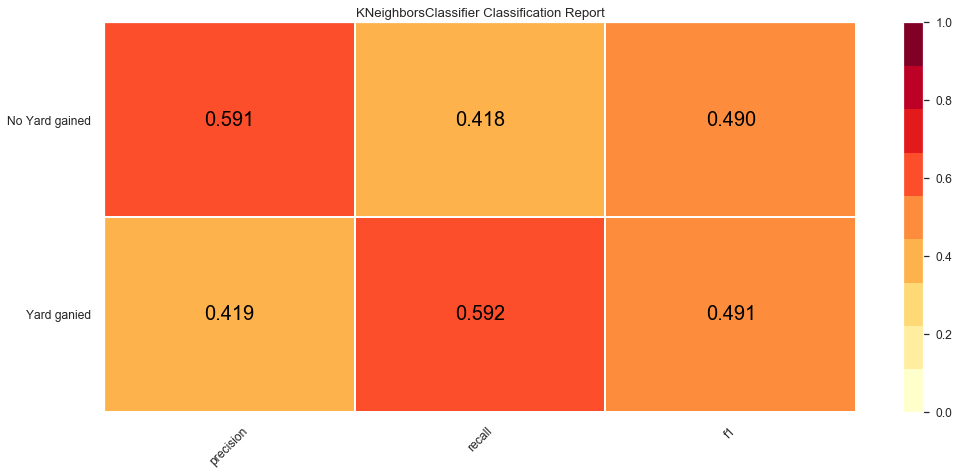

In [407]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(nearest_n, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()


C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


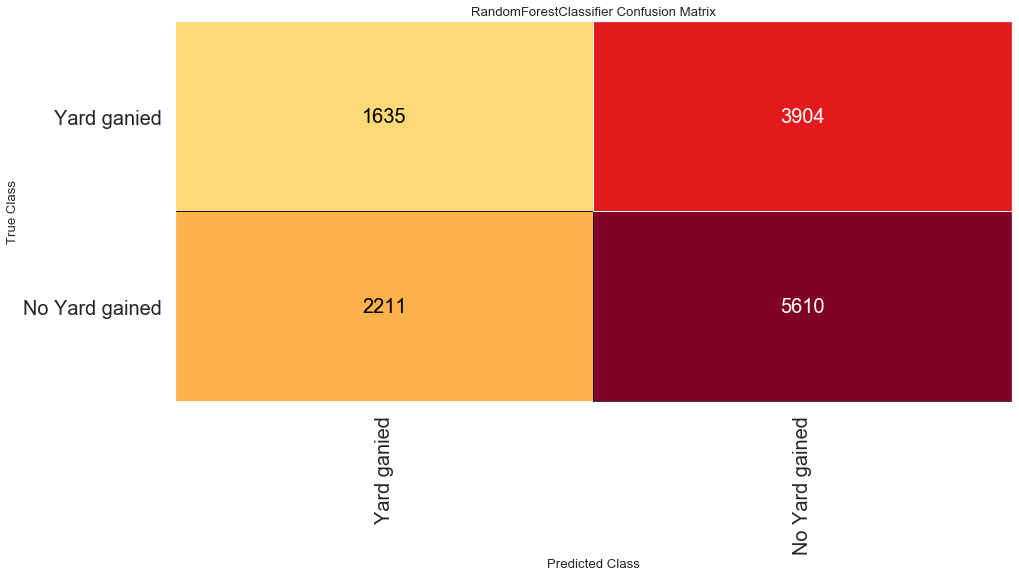

In [283]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train, y_train)


#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:

    cm.poof()

C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


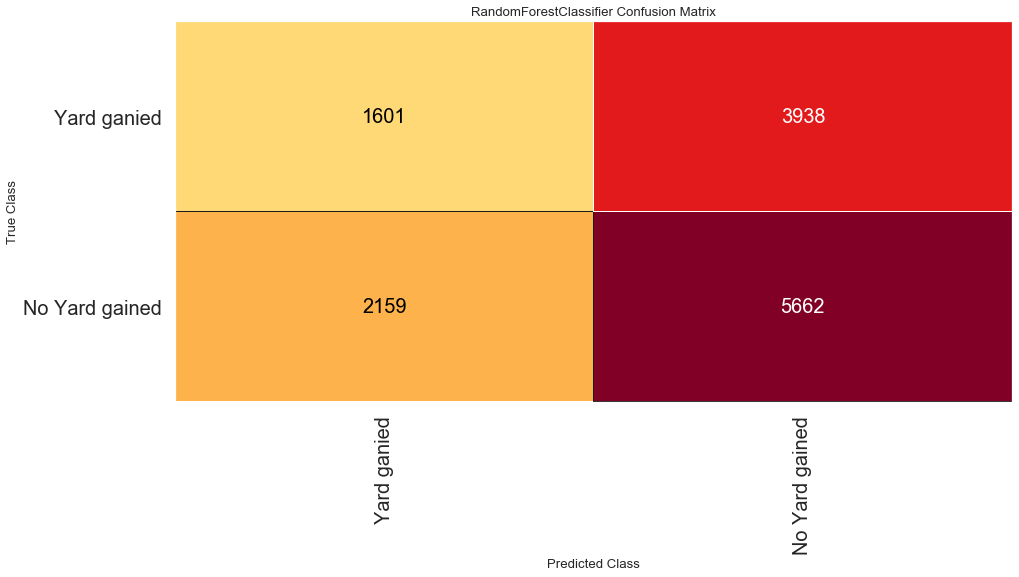

In [408]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train, y_train)


#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.score(X_val, y_val)

for label in cm.ax.texts:

    cm.poof()

C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


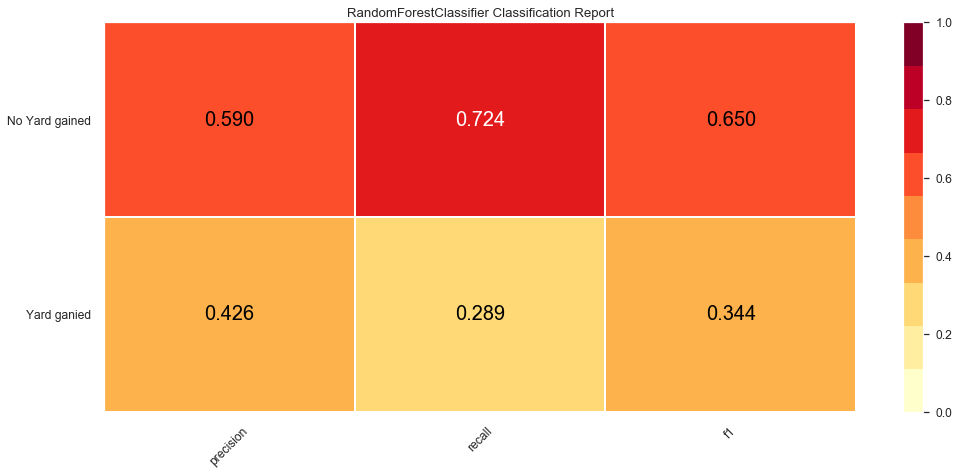

In [409]:
# Precision, Recall, and F1 Score

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_val, y_val) 
g = visualizer.poof()

In [410]:
y_pred = model.predict(X_val)
print("Accuracy of Random Forest is:\n", accuracy_score(y_val, y_pred))

Accuracy of Random Forest is:
 0.5436377245508982


In [651]:
X_train


,quarter,down,yardsToGo,yardlineNumber,epa,offenseFormation__EMPTY,offenseFormation__I_FORM,offenseFormation__JUMBO,offenseFormation__PISTOL,offenseFormation__SHOTGUN,...,personnelO__j,personnelO__k,personnelO__l,personnelO__m,personnelO__n,personnelO__o,personnelO__p,personnelO__q,personnelO__r,personnelO__s
10255,3,3,9,26,-1.646864,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18787,1,2,8,10,0.518693,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4298,4,2,9,42,-0.820671,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13710,4,1,10,27,-0.103048,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18706,1,3,16,32,2.835275,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,2,1,10,45,0.665821,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5217,4,2,2,33,1.650392,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1244,4,2,4,30,-5.758633,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14207,4,1,20,48,-0.416982,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [660]:
new = X_train[['quarter', 'down', 'yardsToGo', 'yardlineNumber', 'epa', 'offenseFormation__EMPTY', 'offenseFormation__I_FORM', 'offenseFormation__JUMBO',
                   'offenseFormation__PISTOL', 'offenseFormation__SHOTGUN', 'offenseFormation__SINGLEBACK', 'offenseFormation__WILDCAT'
]]


In [661]:
X_train1 = new

In [663]:
X_val1 = X_val[['quarter', 'down', 'yardsToGo', 'yardlineNumber', 'epa', 'offenseFormation__EMPTY', 'offenseFormation__I_FORM', 'offenseFormation__JUMBO',
                   'offenseFormation__PISTOL', 'offenseFormation__SHOTGUN', 'offenseFormation__SINGLEBACK', 'offenseFormation__WILDCAT']]

C:\Users\Gloria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gloria\Anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


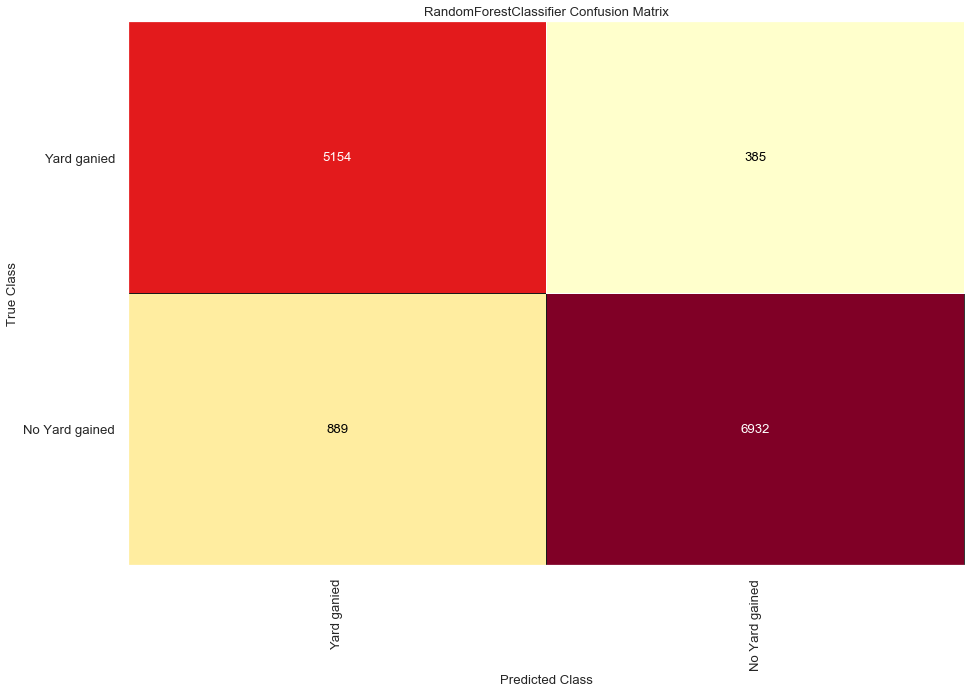

In [664]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train1, y_train)


#The ConfusionMatrix visualizer taxes a model
classes = ['Yard ganied','No Yard gained']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.score(X_val1, y_val)

for label in cm.ax.texts:

    cm.poof()

In [666]:
y_pred = model.predict(X_val1)
print("Accuracy of Random Forest is:\n", accuracy_score(y_val, y_pred))

Accuracy of Random Forest is:
 0.9046407185628742
